In [48]:
import numpy as np
import pandas as pd
import keras.backend as K

from keras.models import Model, Sequential
from keras import models, layers, optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.utils.np_utils import to_categorical
from keras.engine.topology import Layer, InputSpec

from sklearn.utils import shuffle
from sklearn.utils.linear_assignment_ import linear_assignment

import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import backend as K

In [4]:
# kepler_data = pd.read_csv("kepler_small_sample.csv", header=159)
kepler_data = pd.read_csv("kepler_data_full.csv", header=159)

In [4]:
kepler_data.columns.values

array(['rowid', 'kepid', 'tce_plnt_num', 'tce_rogue_flag',
       'tce_delivname', 'rowupdate', 'tce_datalink_dvs',
       'tce_datalink_dvr', 'tce_period', 'tce_period_err', 'tce_time0bk',
       'tce_time0bk_err', 'tce_time0', 'tce_time0_err', 'tce_ror',
       'tce_ror_err', 'tce_dor', 'tce_dor_err', 'tce_incl',
       'tce_incl_err', 'tce_impact', 'tce_impact_err', 'tce_duration',
       'tce_duration_err', 'tce_ingress', 'tce_ingress_err', 'tce_depth',
       'tce_depth_err', 'tce_eccen', 'tce_eccen_err', 'tce_longp',
       'tce_longp_err', 'tce_limbdark_mod', 'tce_ldm_coeff1',
       'tce_ldm_coeff2', 'tce_ldm_coeff3', 'tce_ldm_coeff4',
       'tce_num_transits', 'tce_trans_mod', 'tce_full_conv',
       'tce_model_snr', 'tce_model_chisq', 'tce_model_dof', 'tce_robstat',
       'tce_dof1', 'tce_dof2', 'tce_chisq1', 'tce_chisq2',
       'tce_chisqgofdof', 'tce_chisqgof', 'tce_prad', 'tce_prad_err',
       'tce_sma', 'tce_sma_err', 'tce_eqt', 'tce_eqt_err', 'tce_insol',
       'tce

In [112]:
kepler_data.columns.values.size

156

In [113]:
kepler_data

,rowid,kepid,tce_plnt_num,tce_rogue_flag,tce_delivname,rowupdate,tce_datalink_dvs,tce_datalink_dvr,tce_period,tce_period_err,...,tce_dicco_mdec,tce_dicco_mdec_err,tce_dicco_msky,tce_dicco_msky_err,tce_dikco_mra,tce_dikco_mra_err,tce_dikco_mdec,tce_dikco_mdec_err,tce_dikco_msky,tce_dikco_msky_err
0,1,1162345,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-002-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831850,6.693070e-05,...,0.504060,1.2900,0.507070,1.1200,-0.183490,1.2100,0.424890,1.3000,0.462820,1.1000
1,2,1292087,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001292/001292087/dv/kplr001292087-002-2014...,001/001292/001292087/dv/kplr001292087-20141002...,1.095240,1.009340e-05,...,-0.075798,0.2120,0.097899,0.2090,0.206520,0.2250,-0.077214,0.2380,0.220490,0.2200
2,3,1293031,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001293/001293031/dv/kplr001293031-002-2014...,001/001293/001293031/dv/kplr001293031-20141002...,0.719273,1.388330e-05,...,0.337380,0.2890,0.444500,0.2240,-0.308090,0.1910,0.283570,0.2240,0.418720,0.2070
3,4,1162345,3,NaN,q1_q17_dr24_tce,2015-01-15,001/001162/001162345/dv/kplr001162345-003-2014...,001/001162/001162345/dv/kplr001162345-20141002...,0.831833,9.431020e-06,...,0.167200,0.1830,0.253410,0.1970,0.087066,0.2510,0.106320,0.1720,0.137420,0.1960
4,5,1164109,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001164/001164109/dv/kplr001164109-001-2014...,001/001164/001164109/dv/kplr001164109-20141002...,622.408000,8.547390e-03,...,10.358000,0.0894,15.177000,0.0893,-11.060000,0.0892,10.437000,0.0894,15.207000,0.0893
5,6,757450,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000757/000757450/dv/kplr000757450-001-2014...,000/000757/000757450/dv/kplr000757450-20141002...,8.884920,1.186150e-06,...,0.072221,0.0697,0.072362,0.0694,0.069581,0.0719,-0.103820,0.0782,0.124980,0.0763
6,7,892667,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892667/dv/kplr000892667-001-2014...,000/000892/000892667/dv/kplr000892667-20141002...,2.262110,2.726600e-05,...,0.303870,0.1920,0.411080,0.1370,0.139510,0.0883,0.115410,0.1630,0.181060,0.1240
7,8,892772,1,NaN,q1_q17_dr24_tce,2015-01-15,000/000892/000892772/dv/kplr000892772-001-2014...,000/000892/000892772/dv/kplr000892772-20141002...,5.092600,3.144550e-05,...,-1.296300,0.1230,4.920200,0.1610,-4.962200,0.1580,-1.555100,0.1170,5.200200,0.1650
8,9,1026032,1,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-001-2014...,001/001026/001026032/dv/kplr001026032-20141002...,8.460440,3.822250e-07,...,0.051352,0.0669,0.078983,0.0673,-0.004233,0.0737,-0.064448,0.0770,0.064587,0.0770
9,10,1026032,2,NaN,q1_q17_dr24_tce,2015-01-15,001/001026/001026032/dv/kplr001026032-002-2014...,001/001026/001026032/dv/kplr001026032-20141002...,4.230220,7.327150e-07,...,-0.003027,0.0678,0.051184,0.0676,-0.014758,0.0716,-0.137870,0.0841,0.138650,0.0840


In [114]:
kepler_data['av_training_set'].value_counts()

AFP    9596
UNK    4630
PC     3600
NTP    2541
Name: av_training_set, dtype: int64

In [115]:
kepler_data.shape

(20367, 156)

In [3]:
k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


In [4]:

k_data = shuffle(k_data)

# ids = k_data[['rowid', 'kepid']]

# train and test split
y = k_data[['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK']]

# update to be categorical
x = k_data
x = k_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
x = (x - x.mean()) / (x.max() - x.min())

train_test_split_size = 5000
x_test = x[:train_test_split_size]
y_test = y[:train_test_split_size]

x_train = x[train_test_split_size:]
y_train = y[train_test_split_size:]

train_val_split_size = 1000

x_val = x_train[:train_val_split_size]
y_val = y_train[:train_val_split_size]
x_train = x_train[train_val_split_size:]
y_train = y_train[train_val_split_size:]

display(x_train.shape)

# be really dumb and just attempt to pass into a net
model = models.Sequential()
model.add(layers.Dense(50,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dense(4, activation='softmax'))


sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.001, nesterov=False)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(14367, 93)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 124       
Total params: 10,644
Trainable params: 10,644
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=2000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/2000
14367/14367 [==============================] - 3s 189us/step - loss: 2.5590 - acc: 0.4314 - val_loss: 2.2859 - val_acc: 0.4750
Epoch 2/2000
14367/14367 [==============================] - 0s 11us/step - loss: 2.0980 - acc: 0.4679 - val_loss: 1.9039 - val_acc: 0.4750
Epoch 3/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.7819 - acc: 0.4753 - val_loss: 1.6337 - val_acc: 0.5570
Epoch 4/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.5395 - acc: 0.5594 - val_loss: 1.4074 - val_acc: 0.6000
Epoch 5/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.3623 - acc: 0.5774 - val_loss: 1.2695 - val_acc: 0.6140
Epoch 6/2000
14367/14367 [==============================] - 0s 12us/step - loss: 1.2633 - acc: 0.5947 - val_loss: 1.1879 - val_acc: 0.6380
Epoch 7/2000
14367/14367 [==============================] - 0s 11us/step - loss: 1.1963 - acc: 0.6069 - val_loss: 1.

14367/14367 [==============================] - 0s 13us/step - loss: 0.9538 - acc: 0.6370 - val_loss: 0.9324 - val_acc: 0.6660
Epoch 118/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9520 - acc: 0.6397 - val_loss: 0.9276 - val_acc: 0.6640
Epoch 119/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9552 - acc: 0.6368 - val_loss: 0.9261 - val_acc: 0.6670
Epoch 120/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9507 - acc: 0.6410 - val_loss: 0.9336 - val_acc: 0.6710
Epoch 121/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9497 - acc: 0.6389 - val_loss: 0.9259 - val_acc: 0.6700
Epoch 122/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9504 - acc: 0.6385 - val_loss: 0.9235 - val_acc: 0.6700
Epoch 123/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9473 - acc: 0.6418 - val_loss: 0.9312 - val_acc: 0.6570
Epoch 124/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.9190 - acc: 0.6489 - val_loss: 0.8980 - val_acc: 0.6740
Epoch 234/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9200 - acc: 0.6475 - val_loss: 0.9006 - val_acc: 0.6750
Epoch 235/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9182 - acc: 0.6487 - val_loss: 0.9031 - val_acc: 0.6690
Epoch 236/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.9166 - acc: 0.6520 - val_loss: 0.9110 - val_acc: 0.6640
Epoch 237/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9207 - acc: 0.6493 - val_loss: 0.9023 - val_acc: 0.6740
Epoch 238/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9182 - acc: 0.6484 - val_loss: 0.9022 - val_acc: 0.6730
Epoch 239/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9192 - acc: 0.6493 - val_loss: 0.9056 - val_acc: 0.6740
Epoch 240/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8964 - acc: 0.6587 - val_loss: 0.8873 - val_acc: 0.6770
Epoch 350/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8989 - acc: 0.6568 - val_loss: 0.8884 - val_acc: 0.6720
Epoch 351/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.9005 - acc: 0.6585 - val_loss: 0.8860 - val_acc: 0.6780
Epoch 352/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8977 - acc: 0.6572 - val_loss: 0.8908 - val_acc: 0.6760
Epoch 353/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8976 - acc: 0.6570 - val_loss: 0.8961 - val_acc: 0.6670
Epoch 354/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8969 - acc: 0.6583 - val_loss: 0.8872 - val_acc: 0.6690
Epoch 355/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8971 - acc: 0.6578 - val_loss: 0.9023 - val_acc: 0.6550
Epoch 356/2000
14367/14367 [

14367/14367 [==============================] - 0s 13us/step - loss: 0.8840 - acc: 0.6631 - val_loss: 0.8780 - val_acc: 0.6730
Epoch 466/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8872 - acc: 0.6623 - val_loss: 0.8787 - val_acc: 0.6760
Epoch 467/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8863 - acc: 0.6585 - val_loss: 0.8939 - val_acc: 0.6700
Epoch 468/2000
14367/14367 [==============================] - 0s 13us/step - loss: 0.8884 - acc: 0.6610 - val_loss: 0.8809 - val_acc: 0.6770
Epoch 469/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8863 - acc: 0.6624 - val_loss: 0.8817 - val_acc: 0.6740
Epoch 470/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8858 - acc: 0.6608 - val_loss: 0.8754 - val_acc: 0.6730
Epoch 471/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8829 - acc: 0.6626 - val_loss: 0.8729 - val_acc: 0.6780
Epoch 472/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8777 - acc: 0.6618 - val_loss: 0.8689 - val_acc: 0.6780
Epoch 582/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8783 - acc: 0.6635 - val_loss: 0.8739 - val_acc: 0.6760
Epoch 583/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8778 - acc: 0.6619 - val_loss: 0.8869 - val_acc: 0.6640
Epoch 584/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8886 - acc: 0.6600 - val_loss: 0.8683 - val_acc: 0.6780
Epoch 585/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8735 - acc: 0.6642 - val_loss: 0.8682 - val_acc: 0.6830
Epoch 586/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8753 - acc: 0.6645 - val_loss: 0.8731 - val_acc: 0.6730
Epoch 587/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8792 - acc: 0.6604 - val_loss: 0.8777 - val_acc: 0.6760
Epoch 588/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8672 - acc: 0.6658 - val_loss: 0.8783 - val_acc: 0.6690
Epoch 698/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8728 - acc: 0.6641 - val_loss: 0.8591 - val_acc: 0.6740
Epoch 699/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8667 - acc: 0.6678 - val_loss: 0.8631 - val_acc: 0.6750
Epoch 700/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8676 - acc: 0.6678 - val_loss: 0.8645 - val_acc: 0.6760
Epoch 701/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8663 - acc: 0.6692 - val_loss: 0.8614 - val_acc: 0.6760
Epoch 702/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8662 - acc: 0.6690 - val_loss: 0.8737 - val_acc: 0.6620
Epoch 703/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8683 - acc: 0.6672 - val_loss: 0.8678 - val_acc: 0.6720
Epoch 704/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8617 - acc: 0.6646 - val_loss: 0.8661 - val_acc: 0.6650
Epoch 814/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8598 - acc: 0.6704 - val_loss: 0.8725 - val_acc: 0.6750
Epoch 815/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8610 - acc: 0.6699 - val_loss: 0.8647 - val_acc: 0.6700
Epoch 816/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8597 - acc: 0.6710 - val_loss: 0.8575 - val_acc: 0.6770
Epoch 817/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8596 - acc: 0.6700 - val_loss: 0.8614 - val_acc: 0.6770
Epoch 818/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8588 - acc: 0.6693 - val_loss: 0.8581 - val_acc: 0.6780
Epoch 819/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8571 - acc: 0.6718 - val_loss: 0.8553 - val_acc: 0.6710
Epoch 820/2000
14367/14367 [

14367/14367 [==============================] - 0s 11us/step - loss: 0.8528 - acc: 0.6732 - val_loss: 0.8562 - val_acc: 0.6720
Epoch 930/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8526 - acc: 0.6752 - val_loss: 0.8488 - val_acc: 0.6780
Epoch 931/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8510 - acc: 0.6822 - val_loss: 0.8480 - val_acc: 0.6710
Epoch 932/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8530 - acc: 0.6741 - val_loss: 0.8590 - val_acc: 0.6740
Epoch 933/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8511 - acc: 0.6775 - val_loss: 0.8537 - val_acc: 0.6750
Epoch 934/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8514 - acc: 0.6747 - val_loss: 0.8518 - val_acc: 0.6760
Epoch 935/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8529 - acc: 0.6761 - val_loss: 0.8748 - val_acc: 0.6710
Epoch 936/2000
14367/14367 [

Epoch 1045/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8511 - acc: 0.6742 - val_loss: 0.8493 - val_acc: 0.6830
Epoch 1046/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8460 - acc: 0.6782 - val_loss: 0.8640 - val_acc: 0.6720
Epoch 1047/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8550 - acc: 0.6732 - val_loss: 0.8480 - val_acc: 0.6780
Epoch 1048/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8538 - acc: 0.6721 - val_loss: 0.8552 - val_acc: 0.6730
Epoch 1049/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8534 - acc: 0.6740 - val_loss: 0.8679 - val_acc: 0.6730
Epoch 1050/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8504 - acc: 0.6723 - val_loss: 0.8452 - val_acc: 0.6850
Epoch 1051/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8486 - acc: 0.6773 - val_loss: 0.8506 - val_acc: 0.6770
Epoch 

Epoch 1160/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8498 - acc: 0.6761 - val_loss: 0.8438 - val_acc: 0.6770
Epoch 1161/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8432 - acc: 0.6802 - val_loss: 0.8530 - val_acc: 0.6800
Epoch 1162/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8417 - acc: 0.6791 - val_loss: 0.8461 - val_acc: 0.6740
Epoch 1163/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8412 - acc: 0.6804 - val_loss: 0.8545 - val_acc: 0.6730
Epoch 1164/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8482 - acc: 0.6727 - val_loss: 0.8433 - val_acc: 0.6840
Epoch 1165/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8456 - acc: 0.6775 - val_loss: 0.8437 - val_acc: 0.6820
Epoch 1166/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8408 - acc: 0.6789 - val_loss: 0.8421 - val_acc: 0.6780
Epoch 

Epoch 1275/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8372 - acc: 0.6803 - val_loss: 0.8494 - val_acc: 0.6750
Epoch 1276/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8413 - acc: 0.6803 - val_loss: 0.8444 - val_acc: 0.6710
Epoch 1277/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8362 - acc: 0.6799 - val_loss: 0.8481 - val_acc: 0.6820
Epoch 1278/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8392 - acc: 0.6818 - val_loss: 0.8400 - val_acc: 0.6810
Epoch 1279/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8355 - acc: 0.6810 - val_loss: 0.8419 - val_acc: 0.6840
Epoch 1280/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8391 - acc: 0.6801 - val_loss: 0.8507 - val_acc: 0.6810
Epoch 1281/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8391 - acc: 0.6774 - val_loss: 0.8400 - val_acc: 0.6830
Epoch 

Epoch 1390/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8357 - acc: 0.6808 - val_loss: 0.8411 - val_acc: 0.6760
Epoch 1391/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8352 - acc: 0.6825 - val_loss: 0.8363 - val_acc: 0.6850
Epoch 1392/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8348 - acc: 0.6810 - val_loss: 0.8481 - val_acc: 0.6770
Epoch 1393/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8352 - acc: 0.6819 - val_loss: 0.8400 - val_acc: 0.6760
Epoch 1394/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8359 - acc: 0.6828 - val_loss: 0.8455 - val_acc: 0.6790
Epoch 1395/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8335 - acc: 0.6814 - val_loss: 0.8406 - val_acc: 0.6800
Epoch 1396/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8349 - acc: 0.6790 - val_loss: 0.8419 - val_acc: 0.6810
Epoch 

Epoch 1505/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6831 - val_loss: 0.8428 - val_acc: 0.6690
Epoch 1506/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8335 - acc: 0.6824 - val_loss: 0.8427 - val_acc: 0.6710
Epoch 1507/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8378 - acc: 0.6792 - val_loss: 0.8372 - val_acc: 0.6840
Epoch 1508/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8287 - acc: 0.6822 - val_loss: 0.8394 - val_acc: 0.6810
Epoch 1509/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8300 - acc: 0.6841 - val_loss: 0.8384 - val_acc: 0.6780
Epoch 1510/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8325 - acc: 0.6791 - val_loss: 0.8460 - val_acc: 0.6760
Epoch 1511/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8320 - acc: 0.6834 - val_loss: 0.8361 - val_acc: 0.6800
Epoch 

Epoch 1620/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6834 - val_loss: 0.8316 - val_acc: 0.6730
Epoch 1621/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6830 - val_loss: 0.8416 - val_acc: 0.6710
Epoch 1622/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6858 - val_loss: 0.8360 - val_acc: 0.6730
Epoch 1623/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8293 - acc: 0.6835 - val_loss: 0.8407 - val_acc: 0.6690
Epoch 1624/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8310 - acc: 0.6811 - val_loss: 0.8347 - val_acc: 0.6840
Epoch 1625/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8282 - acc: 0.6842 - val_loss: 0.8387 - val_acc: 0.6760
Epoch 1626/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8291 - acc: 0.6827 - val_loss: 0.8405 - val_acc: 0.6740
Epoch 

Epoch 1735/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8252 - acc: 0.6831 - val_loss: 0.8516 - val_acc: 0.6680
Epoch 1736/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8276 - acc: 0.6819 - val_loss: 0.8459 - val_acc: 0.6740
Epoch 1737/2000
14367/14367 [==============================] - 0s 10us/step - loss: 0.8260 - acc: 0.6839 - val_loss: 0.8384 - val_acc: 0.6820
Epoch 1738/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8343 - acc: 0.6792 - val_loss: 0.8425 - val_acc: 0.6740
Epoch 1739/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8265 - acc: 0.6834 - val_loss: 0.8384 - val_acc: 0.6870
Epoch 1740/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8261 - acc: 0.6844 - val_loss: 0.8339 - val_acc: 0.6820
Epoch 1741/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8260 - acc: 0.6812 - val_loss: 0.8452 - val_acc: 0.6750
Epoch 

Epoch 1850/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8230 - acc: 0.6846 - val_loss: 0.8488 - val_acc: 0.6710
Epoch 1851/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8260 - acc: 0.6869 - val_loss: 0.8325 - val_acc: 0.6800
Epoch 1852/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8223 - acc: 0.6856 - val_loss: 0.8457 - val_acc: 0.6710
Epoch 1853/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8268 - acc: 0.6843 - val_loss: 0.8373 - val_acc: 0.6870
Epoch 1854/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8267 - acc: 0.6806 - val_loss: 0.8343 - val_acc: 0.6770
Epoch 1855/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8238 - acc: 0.6840 - val_loss: 0.8474 - val_acc: 0.6720
Epoch 1856/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8267 - acc: 0.6839 - val_loss: 0.8366 - val_acc: 0.6790
Epoch 

Epoch 1965/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8238 - acc: 0.6822 - val_loss: 0.8441 - val_acc: 0.6710
Epoch 1966/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8248 - acc: 0.6859 - val_loss: 0.8309 - val_acc: 0.6710
Epoch 1967/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8259 - acc: 0.6818 - val_loss: 0.8346 - val_acc: 0.6820
Epoch 1968/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8233 - acc: 0.6832 - val_loss: 0.8306 - val_acc: 0.6710
Epoch 1969/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8250 - acc: 0.6814 - val_loss: 0.8331 - val_acc: 0.6840
Epoch 1970/2000
14367/14367 [==============================] - 0s 12us/step - loss: 0.8225 - acc: 0.6843 - val_loss: 0.8389 - val_acc: 0.6810
Epoch 1971/2000
14367/14367 [==============================] - 0s 11us/step - loss: 0.8237 - acc: 0.6804 - val_loss: 0.8302 - val_acc: 0.6760
Epoch 

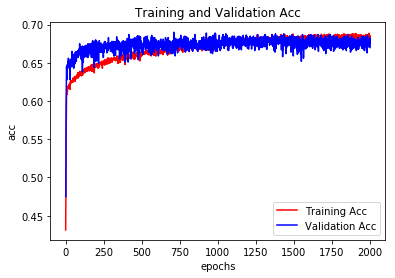

In [120]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()


In [121]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 61us/step


[0.8157173809051513, 0.6822]

In [11]:
y_test.shape


(5000, 4)

In [16]:
y_test.sum()

av_training_set_AFP    2317
av_training_set_NTP     635
av_training_set_PC      890
av_training_set_UNK    1158
dtype: int64

In [25]:
y_test['av_training_set_AFP'].sum()/y_test.shape[0]

0.4734

so what have we learned here? well firstly, as might have been expected, this approach is better than guessing,
but not by much, and we have also learned that there are just too many damn attributes to deal with reasonably
so we will move to the autoencoder work to use in DEC - maybe we can handle the high dimesion data in that setting?
if not well, then we have stuff to think through

In [6]:
## build a fun dumb autoencoder


k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


ae_data = k_data
# update to be categorical
ae_data_y = ae_data
ae_data_y = ae_data[['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK']]
ae_data = ae_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
ae_data = (ae_data - ae_data.mean()) / (ae_data.max() - ae_data.min())

In [8]:
dimensions = [100,90,70,80,60,50,40,30,20]

x = Input(shape=(ae_data.shape[1],))
h = x
for i in range(len(dimensions)):
    h = Dense(dimensions[i], activation='relu')(h)
    
encoding = Dense(10, activation='relu')(h)
y = encoding

for i in range(1,len(dimensions)+1):
    y = Dense(dimensions[-i], activation='relu')(y)
    
y = Dense(ae_data.shape[1], activation='relu')(y)

model = Model(inputs=x, outputs=y)
encoder = Model(inputs=x, outputs=h)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.summary()

history = model.fit(ae_data, ae_data, batch_size=512, epochs=2000)

loss = history.history['loss']

epochs = range(1, len(loss)+1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 93)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_7 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_8 (Dense)              (None, 70)                6370      
_________________________________________________________________
dense_9 (Dense)              (None, 80)                5680      
_________________________________________________________________
dense_10 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                3050      
__________

20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7063
Epoch 130/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7183
Epoch 131/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7126
Epoch 132/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7182
Epoch 133/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7237
Epoch 134/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.7106
Epoch 135/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7124
Epoch 136/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6898
Epoch 137/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7126
Epoch 138/2000
20367/20367 [==============================] - 0s 16us/step - lo

20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6807
Epoch 286/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0098 - acc: 0.6897
Epoch 287/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7290
Epoch 288/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7362
Epoch 289/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7395
Epoch 290/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7389
Epoch 291/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7430
Epoch 292/2000
20367/20367 [==============================] - 0s 17us/step - loss: 0.0097 - acc: 0.7281
Epoch 293/2000
20367/20367 [==============================] - 0s 16us/step - loss: 0.0097 - acc: 0.7222
Epoch 294/2000
20367/20367 [==============================] - 0s 15us/step - lo

KeyboardInterrupt: 

In [14]:
h

<tf.Tensor 'dense_29/Relu:0' shape=(?, 20) dtype=float32>

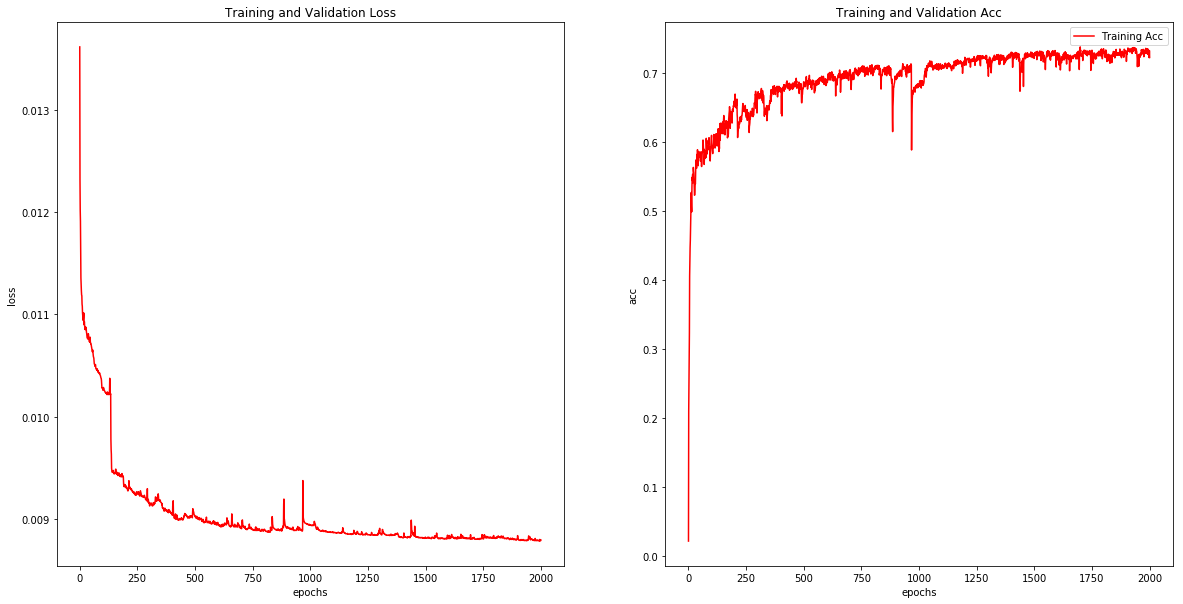

In [10]:
f,axs = plt.subplots(2,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

 
plt.subplot(1,2,2)

acc = history.history['acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

# Begin Actual DEC work

## Build an autoencoder 
### greedy layerwise train
### then finetune

In [7]:
X = ae_data

In [9]:
# ok - so we have a basic autoencoder
# but we did not do layerwise greedy pre training
# so we need to do that layerwise greedy pretrain

layer_sizes = [ae_data.shape[1],100,90,80,70,60,50,40,30,20,10]

# creates the layers to greedy layerwise pretrain
# takes par
def create_layers(layer_sizes):
    autoencoders = []
    encoders = []
    decoders = []
    for i in range(1, len(layer_sizes)):
        if i == len(layer_sizes) - 1:
            act = 'linear'
        else:
            act = 'relu'
        h = Dense(layer_sizes[i], activation=act,
                  input_shape=(layer_sizes[i-1],),
                  name='encoder_%d'%i,
                  bias_initializer='zeros',
                  kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        encoders.append(h)
        
        rev_i = len(layer_sizes) - i
        if i == 1:
            act = 'linear'
        else:
            act = 'relu'
        d = Dense(layer_sizes[i-1], activation=act,
                 name='decoder_%d'%rev_i,
                 bias_initializer='zeros',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None))
        decoders.append(d)
        autoencoder = Sequential([
            Dropout(0.005, input_shape=(layer_sizes[i-1],),name='encoder_dropout_%d'%i),
            h,
            Dropout(0.005, name='decoder_dropout_%d'%rev_i),
            d
        ])
        autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        autoencoders.append(autoencoder)
    return autoencoders, encoders, decoders

# build up some models
autoencoders, encoders, decoders = create_layers(layer_sizes)

encoder = Sequential(encoders)
encoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
decoders.reverse()
autoencoder = Sequential(encoders + decoders)
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))


In [26]:
current_input = X
histories =[]

# Greedy Layer Wise Training
for i, ae in enumerate(autoencoders):
    if i > 0:
        weights = encoders[i-1].get_weights()
        dense_layer = Dense(layer_sizes[i], input_shape=(current_input.shape[1],),
                            activation='relu', weights=weights,
                            name='encoder_dense_copy_%d'%i)
        encoder_model = Sequential([dense_layer])
        encoder_model.compile(loss='mse', optimizer=SGD(lr=0.1, decay=0, momentum=0.9))
        current_input = encoder_model.predict(current_input)
    histories.append(ae.fit(current_input, current_input,
                    batch_size=512, epochs=100))
    
    autoencoder.layers[i].set_weights(ae.layers[1].get_weights())
    autoencoder.layers[len(autoencoder.layers)-i-1].set_weights(ae.layers[-1].get_weights())
    

Epoch 1/100
20367/20367 [==============================] - 1s 32us/step - loss: 0.0138
Epoch 2/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0137
Epoch 3/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0137
Epoch 4/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0136
Epoch 5/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0136
Epoch 6/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0134
Epoch 7/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0132
Epoch 8/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0129
Epoch 9/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0125
Epoch 10/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0120
Epoch 11/100
20367/20367 [==============================] - 0s 6us/step - loss: 0.0113
Epoch 12/100
20367/20367 [=========================

20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 90/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 91/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 92/100
20367/20367 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 93/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 94/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 95/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 96/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 97/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 98/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 99/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 100/100
20367/20367 [=============================

20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 78/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 79/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 80/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 81/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 82/100
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 83/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 84/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 85/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 86/100
20367/20367 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 87/100
20367/20367 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 88/100
20367/20367 [==============================

20367/20367 [==============================] - 0s 4us/step - loss: 3.9757e-04
Epoch 64/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.9483e-04
Epoch 65/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8937e-04
Epoch 66/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8892e-04
Epoch 67/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8926e-04
Epoch 68/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8790e-04
Epoch 69/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8331e-04
Epoch 70/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.9323e-04
Epoch 71/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8743e-04
Epoch 72/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8973e-04
Epoch 73/100
20367/20367 [==============================] - 0s 4us/step - loss: 3.8596e-04
Epoch 74/100

20367/20367 [==============================] - 0s 4us/step - loss: 2.9334e-04
Epoch 49/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.8370e-04
Epoch 50/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.7950e-04
Epoch 51/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.6956e-04
Epoch 52/100
20367/20367 [==============================] - 0s 5us/step - loss: 2.7080e-04
Epoch 53/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.5913e-04
Epoch 54/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.4664e-04
Epoch 55/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.6229e-04
Epoch 56/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.5570e-04
Epoch 57/100
20367/20367 [==============================] - 0s 5us/step - loss: 2.3702e-04
Epoch 58/100
20367/20367 [==============================] - 0s 4us/step - loss: 2.6593e-04
Epoch 59/100

20367/20367 [==============================] - 0s 4us/step - loss: 5.7318e-04
Epoch 31/100
20367/20367 [==============================] - 0s 4us/step - loss: 5.7252e-04
Epoch 32/100
20367/20367 [==============================] - 0s 4us/step - loss: 5.0932e-04
Epoch 33/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.4567e-04
Epoch 34/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.1801e-04
Epoch 35/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.5777e-04
Epoch 36/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.0571e-04
Epoch 37/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.4778e-04
Epoch 38/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.6412e-04
Epoch 39/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.9864e-04
Epoch 40/100
20367/20367 [==============================] - 0s 4us/step - loss: 4.3632e-04
Epoch 41/100

10


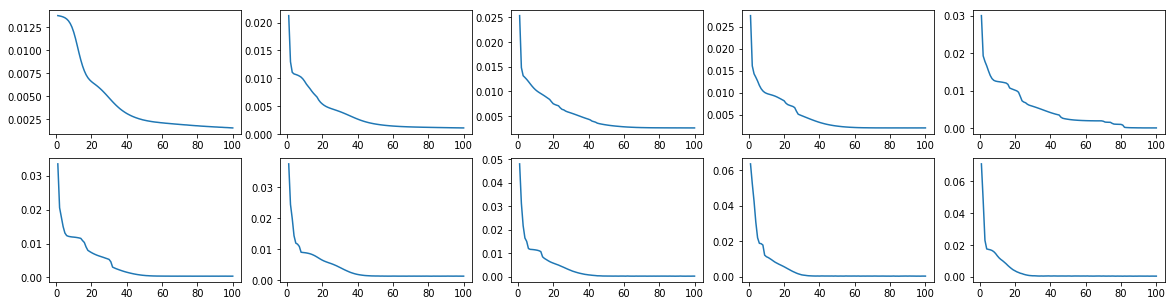

In [27]:
plt.clf()

tot = len(histories)
cols = 5
rows = tot//cols
rows += tot%cols

pos = range(1,tot+1)
print(tot)
fig = plt.figure(1, )
fig.set_figheight(5)
fig.set_figwidth(20)

for i,h in enumerate(histories):
    ax = fig.add_subplot(rows,cols,pos[i])
    loss = h.history['loss']
    epochs = range(1, len(loss)+1)
    ax.plot(epochs, loss)

plt.show()

In [28]:
history = autoencoder.fit(X,X, batch_size=512, epochs=200)

Epoch 1/200
20367/20367 [==============================] - 1s 37us/step - loss: 0.0027
Epoch 2/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0023
Epoch 3/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0023
Epoch 4/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0023
Epoch 5/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0023
Epoch 6/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0023
Epoch 7/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 8/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 9/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0022
Epoch 10/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0022
Epoch 11/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 12/200
20367/20367 [===============

20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 187/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 188/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0014
Epoch 189/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 190/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0014
Epoch 191/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 192/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 193/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 194/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 195/200
20367/20367 [==============================] - 0s 11us/step - loss: 0.0014
Epoch 196/200
20367/20367 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 197/200
20367/20367 [========

In [31]:
autoencoder.save_weights('autoencoder_smaller.h5')

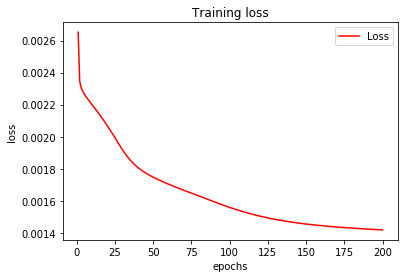

In [30]:
plt.clf()
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [11]:
# this looks nice   so what we ought to do is to drop the decoder into the front of our basic neural net 
# and see what kinda improvements we get?

In [10]:
autoencoder.load_weights('autoencoder_smaller.h5')

In [11]:
for i,layer in enumerate(encoder.layers):
    layer.set_weights(autoencoder.layers[i].get_weights())

In [12]:
### THIS IS THE ACTUAL DATA CLEAN CELL
k_data = kepler_data.drop(['tce_rogue_flag', 'tce_delivname', 'rowupdate', 
                           'tce_datalink_dvs', 'tce_datalink_dvr', 'tce_steff_prov', 
                           'tce_slogg_prov', 'tce_smet_prov','tce_sradius_prov', 'tce_limbdark_mod',
                           'tce_trans_mod', 'tce_eccen', 'tce_eccen_err', 'tce_longp', 'tce_longp_err'
                          ],axis=1)
# drop some columns that we will not be using
# starting with all NA columns
k_data.dropna(axis=1,how='any', inplace=True)

# drop the Autovetter stuff
autovetter_cols = ['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp',
                   'av_vf_afp_err', 'av_vf_ntp', 'av_vf_ntp_err', 
                   'av_pp_pc','av_pp_afp', 'av_pp_ntp', 
                   'av_training_set', 'av_pred_class']
# drop all autovetter columns execpt the training set - as those are manually set - take as "truth"

k_data = k_data.drop(['av_vf_pc', 'av_vf_pc_err', 'av_vf_afp','av_vf_afp_err',
                           'av_vf_ntp', 'av_vf_ntp_err', 'av_pp_pc','av_pp_afp', 
                           'av_pp_ntp', 'av_pred_class'],axis=1)

col_names = k_data.columns.values

k_data = pd.get_dummies(k_data, columns=['av_training_set'])


# train and test split
y = k_data[['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK']]

# update to be categorical
x = k_data
x = k_data.drop(['av_training_set_AFP','av_training_set_NTP','av_training_set_PC', 'av_training_set_UNK'], axis=1)
#x = k_data.drop(['rowid','kepid'], axis=1)
#x = k_data[['tce_mesmad','tce_maxmes', 'tce_minmes', 'tce_maxmesd', 'tce_minmesd', 'tce_plnt_num']]
x = (x - x.mean()) / (x.max() - x.min())

train_test_split_size = 5000
x_test = x[:train_test_split_size]
y_test = y[:train_test_split_size]

x_train = x[train_test_split_size:]
y_train = y[train_test_split_size:]

train_val_split_size = 1000

x_val = x_train[:train_val_split_size]
y_val = y_train[:train_val_split_size]
x_train = x_train[train_val_split_size:]
y_train = y_train[train_val_split_size:]


In [22]:


# be really dumb and just attempt to pass into a net
deep_classifier = models.Sequential()
deep_classifier.add(layers.Dense(10,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(10,)))
deep_classifier.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
deep_classifier.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(4, activation='softmax'))

model = Sequential([encoder,
                   deep_classifier])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 10)                42850     
_________________________________________________________________
sequential_24 (Sequential)   (None, 4)                 4054      
Total params: 46,904
Trainable params: 46,904
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/200
14367/14367 [==============================] - 1s 48us/step - loss: 2.1766 - acc: 0.4184 - val_loss: 1.9651 - val_acc: 0.4720
Epoch 2/200
14367/14367 [==============================] - 0s 13us/step - loss: 1.8660 - acc: 0.4537 - val_loss: 1.7176 - val_acc: 0.4720
Epoch 3/200
14367/14367 [==============================] - 0s 12us/step - loss: 1.6298 - acc: 0.4537 - val_loss: 1.5253 - val_acc: 0.4720
Epoch 4/200
14367/14367 [==============================] - 0s 13us/step - loss: 1.4646 - acc: 0.4992 - val_loss: 1.3913 - val_acc: 0.5790
Epoch 5/200
14367/14367 [==============================] - 0s 14us/step - loss: 1.3189 - acc: 0.5992 - val_loss: 1.2560 - val_acc: 0.5940
Epoch 6/200
14367/14367 [==============================] - 0s 12us/step - loss: 1.1361 - acc: 0.6133 - val_loss: 1.1146 - val_acc: 0.5940
Epoch 7/200
14367/14367 [==============================] - 0s 14us/step - loss: 1.0384 - acc: 0.6163 - val_loss: 1.0555 - v

Epoch 118/200
14367/14367 [==============================] - 0s 15us/step - loss: 0.6446 - acc: 0.7182 - val_loss: 0.8244 - val_acc: 0.6340
Epoch 119/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.6380 - acc: 0.7256 - val_loss: 0.8082 - val_acc: 0.6450
Epoch 120/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.6309 - acc: 0.7283 - val_loss: 0.8244 - val_acc: 0.6330
Epoch 121/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.6290 - acc: 0.7294 - val_loss: 0.8849 - val_acc: 0.6380
Epoch 122/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.6608 - acc: 0.7109 - val_loss: 0.8070 - val_acc: 0.6370
Epoch 123/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.6369 - acc: 0.7247 - val_loss: 0.7968 - val_acc: 0.6460
Epoch 124/200
14367/14367 [==============================] - 0s 15us/step - loss: 0.6299 - acc: 0.7287 - val_loss: 0.8012 - val_acc: 0.6430
Epoch 125/200
14367/

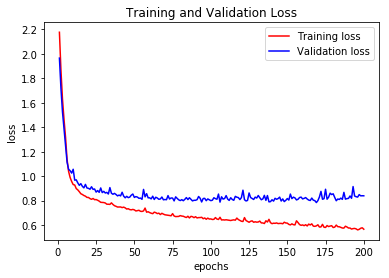

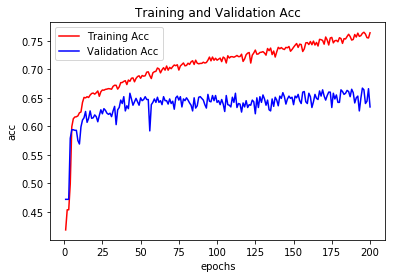

In [24]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [25]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 48us/step


[0.852596959066391, 0.6582]

In [14]:
deep_classifier = models.Sequential()
deep_classifier.add(layers.Dense(10,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(10,)))
deep_classifier.add(layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
deep_classifier.add(layers.Dense(4, activation='softmax'))

model = Sequential([encoder,
                   deep_classifier])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 10)                42850     
_________________________________________________________________
sequential_14 (Sequential)   (None, 4)                 219       
Total params: 43,069
Trainable params: 43,069
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train,
                    y_train.values,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 14367 samples, validate on 1000 samples
Epoch 1/200
14367/14367 [==============================] - 1s 48us/step - loss: 1.9893 - acc: 0.5481 - val_loss: 1.2757 - val_acc: 0.5560
Epoch 2/200
14367/14367 [==============================] - 0s 12us/step - loss: 1.1497 - acc: 0.6004 - val_loss: 1.1386 - val_acc: 0.5710
Epoch 3/200
14367/14367 [==============================] - 0s 13us/step - loss: 0.9492 - acc: 0.6236 - val_loss: 1.0214 - val_acc: 0.5950
Epoch 4/200
14367/14367 [==============================] - 0s 13us/step - loss: 0.8379 - acc: 0.6460 - val_loss: 0.9437 - val_acc: 0.6130
Epoch 5/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.7878 - acc: 0.6755 - val_loss: 0.9792 - val_acc: 0.6190
Epoch 6/200
14367/14367 [==============================] - 0s 13us/step - loss: 0.7706 - acc: 0.6949 - val_loss: 0.9246 - val_acc: 0.6330
Epoch 7/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.7563 - acc: 0.7032 - val_loss: 0.9255 - v

Epoch 118/200
14367/14367 [==============================] - 0s 13us/step - loss: 0.4886 - acc: 0.8032 - val_loss: 0.9957 - val_acc: 0.6450
Epoch 119/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.5006 - acc: 0.7956 - val_loss: 1.0051 - val_acc: 0.6510
Epoch 120/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.4890 - acc: 0.7990 - val_loss: 1.0172 - val_acc: 0.6520
Epoch 121/200
14367/14367 [==============================] - 0s 13us/step - loss: 0.4928 - acc: 0.7991 - val_loss: 0.9974 - val_acc: 0.6420
Epoch 122/200
14367/14367 [==============================] - 0s 12us/step - loss: 0.5261 - acc: 0.7817 - val_loss: 0.9735 - val_acc: 0.6560
Epoch 123/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.4961 - acc: 0.7952 - val_loss: 1.0663 - val_acc: 0.6050
Epoch 124/200
14367/14367 [==============================] - 0s 14us/step - loss: 0.5343 - acc: 0.7801 - val_loss: 0.9778 - val_acc: 0.6550
Epoch 125/200
14367/

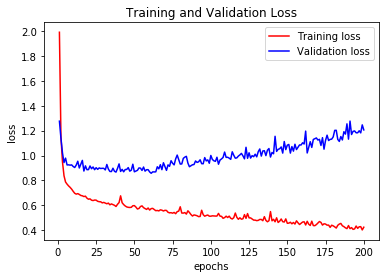

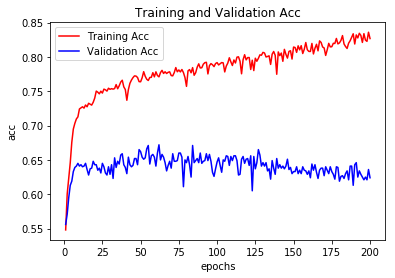

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [38]:
results = model.evaluate(x_test, y_test)
results


5000/5000 [==============================] - 0s 36us/step


[3.404834181022644, 0.581]

Well clearly we've overfit the crap out of our encoder I think - because with it we are getting fuck all on the validation improvement - so maybe let's not do that and cap it earlier

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 10)                42850     
_________________________________________________________________
sequential_28 (Sequential)   (None, 4)                 109       
Total params: 42,959
Trainable params: 42,959
Non-trainable params: 0
_________________________________________________________________
Train on 14367 samples, validate on 1000 samples
Epoch 1/20
14367/14367 [==============================] - 1s 51us/step - loss: 1.5689 - acc: 0.4927 - val_loss: 1.1598 - val_acc: 0.5400
Epoch 2/20
14367/14367 [==============================] - 0s 13us/step - loss: 0.9018 - acc: 0.6150 - val_loss: 1.1086 - val_acc: 0.5590
Epoch 3/20
14367/14367 [==============================] - 0s 13us/step - loss: 0.7881 - acc: 0.6731 - val_loss: 1.0900 - val_acc: 0.6280
Epoch 4/20
14367/14367 [==============================] - 0s 14us/step - l

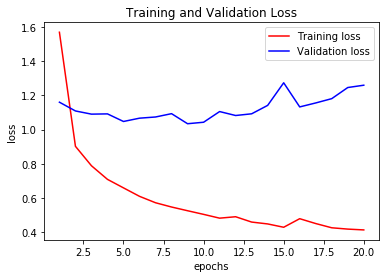

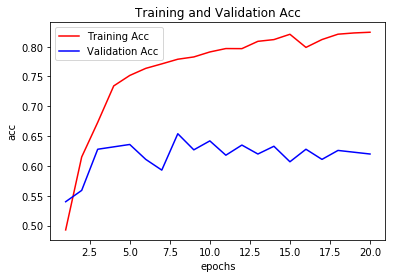

In [29]:
deep_classifier = models.Sequential()
deep_classifier.add(layers.Dense(7,kernel_initializer='random_normal',
                       kernel_regularizer=regularizers.l2(0.01),
                       activation='relu', 
                       input_shape=(10,)))
deep_classifier.add(layers.Dense(4, activation='softmax'))

model = Sequential([encoder,
                   deep_classifier])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train,
                    y_train.values,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()


plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [13]:
class ClusteringLayer(Layer): 
    
    def __init__(self, output_dim, input_dim=None, weights=None, alpha=1.0, **kwargs):
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.alpha = alpha        
        self.initial_weights = weights
        self.input_spec = [InputSpec(ndim=2)]
        
        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(ClusteringLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = [InputSpec(dtype=K.floatx(),
                                     shape=(None, input_dim))]
        self.W = K.variable(self.initial_weights)
        self.trainable_weights = [self.W]
        
    def call(self, x, mask=None):
        q = 1.0/(1.0 + K.sqrt(K.sum(K.square(K.expand_dims(x, 1) - self.W), axis=2))**2/self.alpha)
        q = q**((self.alpha+1.0)/2.0)
        q = K.transpose(K.transpose(q)/K.sum(q, axis=1))
        return q
    
    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return (input_shape[0], self.output_dim)
    
    def get_output_shape(self, input_shape):
        return self.get_output_shape(input_shape)
    
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.output_dim
    
    def get_config(self):
        config = {'output_dim': self.output_dim,
                  'input_dim': self.input_dim}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items() + list(config.items)))
    

In [60]:
from sklearn.cluster import KMeans

cluster_centers = None
y_prediction = 0
n_clusters=4
# initialize cluster centres using k-means
print('Initializing cluster centres with k-means.')
if cluster_centers is None:
    kmeans = KMeans(n_clusters=n_clusters, n_init=20)
    y_prediction = kmeans.fit_predict(encoder.predict(X))
    cluster_centers = kmeans.cluster_centers_
cluster_centers 

Initializing cluster centres with k-means.


array([[-1.3192614 , -0.67387515, -1.0661435 ,  1.1519638 , -1.3874824 ,
        -0.59217966,  0.04273814, -0.8631702 , -0.85108906,  1.3932242 ],
       [-2.6727118 , -1.3539166 , -3.8449578 ,  3.337731  , -4.368597  ,
        -2.1965017 , -0.07293184, -2.1344705 , -3.4495184 ,  2.6480927 ],
       [-0.14163971,  0.17557585,  0.26744056, -0.11874795, -0.2751006 ,
         0.08005375,  0.14786506, -0.0121094 ,  0.19194698, -0.03538728],
       [-1.9628378 , -1.0120806 , -2.3214073 ,  2.1457813 , -2.7296338 ,
        -1.3050716 , -0.03082382, -1.4509082 , -2.0170188 ,  2.0142813 ]],
      dtype=float32)

In [61]:
n_clusters = 4
model = Sequential([encoder,
                    ClusteringLayer(n_clusters,
                                    weights=cluster_centers,
                                    name='clustering')])

model.compile(optimizer='adadelta',
              loss='kullback_leibler_divergence')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 10)                42850     
_________________________________________________________________
clustering (ClusteringLayer) (None, 4)                 40        
Total params: 42,890
Trainable params: 42,890
Non-trainable params: 0
_________________________________________________________________


In [62]:
def p_mat(q):
    weight = q**2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

labels = {"av_training_set_AFP": 0,
          "av_training_set_NTP":1,
          "av_training_set_PC":2,
          "av_training_set_UNK":3}
def cluster_acc(y_truth, y_pred):
    yidx = y_truth.idxmax(1).values
    y_true = np.vectorize(labels.get)(yidx)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max())+1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind])*1.0/y_pred.size, w

In [67]:
batch_size = 512
y = ae_data_y
update_interval = X.shape[0]/batch_size
iteration = 0
index = 0
train_dec_epochs = 2000
master_acc = []
# training loop
for i in range(train_dec_epochs):
    
    #if i % update_interval == 0:
    if True:
        q = model.predict(X, verbose=0)
        print(q)
        p = p_mat(q)
        y_pred = q.argmax(1)
        delta_label = ((y_pred == y_prediction).sum().astype(np.float32) / y_pred.shape[0])
        if y is not None:
            acc = cluster_acc(y, y_prediction)[0]
            master_acc.append(acc)
            print('Iteration '+str(i)+', Accuracy '+str(np.round(acc, 5)))
        else:
            print(str(np.round(delta_label*100, 5))+'%change in label assignment')
        print(str(np.round(delta_label*100, 5))+'%change in label assignment')            
        
        y_prediction = y_pred
        
    for i, layer in enumerate(encoder.layers):
        layer.set_weights(model.layers[0].layers[i].get_weights())
    cluster_centers = model.layers[-1].get_weights()[0]
    
    
    
    if(index+1)*batch_size > X.shape[0]:
        loss = model.train_on_batch(X[index*batch_size::], p[index*batch_size::],
                                    p[index*batch_size::])
        index = 0
    else:
        loss = model.train_on_batch(X[index*batch_size:(index+1) * batch_size],
                                    p[index*batch_size:(index+1) * batch_size])
        print(loss)
        index += 1
    
    iteration +=1

        

[[0.03994622 0.78634316 0.01518675 0.15852384]
 [0.07820538 0.07552257 0.01839293 0.82787913]
 [0.17717837 0.05755479 0.0298038  0.735463  ]
 ...
 [0.02094117 0.90654707 0.00903262 0.0634792 ]
 [0.05905059 0.00886428 0.91173416 0.02035095]
 [0.0590625  0.00886436 0.9117213  0.02035187]]
Iteration 0, Accuracy 0.38562
95.91005%change in label assignment
0.09967319
[[0.02948083 0.8526732  0.01158308 0.10626293]
 [0.07728121 0.09487899 0.01902971 0.80881006]
 [0.13701274 0.05613574 0.02459089 0.78226066]
 ...
 [0.02355951 0.89860225 0.01036987 0.0674684 ]
 [0.05905515 0.00886198 0.91173935 0.0203435 ]
 [0.05906754 0.00886223 0.9117254  0.02034477]]
Iteration 1, Accuracy 0.38911
97.82491%change in label assignment
0.097831935
[[0.05044249 0.7139372  0.01851884 0.21710147]
 [0.07972737 0.06866463 0.01815165 0.8334564 ]
 [0.1997182  0.05813975 0.03218572 0.70995635]
 ...
 [0.02164274 0.8990746  0.00902496 0.07025772]
 [0.05888709 0.00884991 0.9119616  0.02030142]
 [0.05890264 0.00885018 0.911

[[0.08329058 0.36626536 0.02646627 0.52397776]
 [0.12910469 0.05599522 0.0239225  0.79097754]
 [0.42676586 0.05553323 0.04955419 0.46814674]
 ...
 [0.03584418 0.81251776 0.01389123 0.13774683]
 [0.05805904 0.00874069 0.91319615 0.02000404]
 [0.05806452 0.00874068 0.9131904  0.02000432]]
Iteration 23, Accuracy 0.39166
89.93961%change in label assignment
0.09890648
[[0.02347559 0.8893694  0.00960241 0.07755255]
 [0.08328591 0.17171459 0.02289467 0.7221048 ]
 [0.10091737 0.05755255 0.02005029 0.82147986]
 ...
 [0.03962367 0.84220356 0.01872497 0.09944782]
 [0.05828227 0.00875684 0.912912   0.02004881]
 [0.05829059 0.00875695 0.91290295 0.02004956]]
Iteration 24, Accuracy 0.38479
85.75637%change in label assignment
0.104344115
[[0.05633186 0.6679373  0.02032999 0.2554008 ]
 [0.08124489 0.06445932 0.01811363 0.8361822 ]
 [0.2246288  0.05865462 0.0347692  0.68194735]
 ...
 [0.02119406 0.9023386  0.00895044 0.06751686]
 [0.05805692 0.00873506 0.91320026 0.0200077 ]
 [0.05806534 0.00873512 0.9

[[0.02162325 0.9026059  0.00915003 0.06662089]
 [0.08488634 0.22075696 0.02435646 0.6700002 ]
 [0.07969226 0.06599725 0.01761189 0.8366986 ]
 ...
 [0.04447736 0.82563114 0.02134941 0.10854208]
 [0.05748931 0.00864576 0.91406465 0.0198003 ]
 [0.05750524 0.00864612 0.9140465  0.01980209]]
Iteration 46, Accuracy 0.3867
83.55673%change in label assignment
0.10408607
[[0.04800155 0.72937346 0.01778286 0.20484217]
 [0.0791555  0.06616965 0.01790323 0.83677167]
 [0.18362635 0.05744903 0.0303922  0.72853243]
 ...
 [0.02074792 0.90606505 0.00888809 0.06429899]
 [0.05713503 0.00862287 0.9145079  0.01973414]
 [0.0571537  0.00862322 0.9144869  0.01973613]]
Iteration 47, Accuracy 0.40109
89.96907%change in label assignment
0.099592395
[[0.03294915 0.8309082  0.01272516 0.1234175 ]
 [0.07574106 0.08462172 0.01811834 0.82151896]
 [0.13044651 0.05580809 0.02356086 0.7901845 ]
 ...
 [0.02310886 0.89987797 0.01011892 0.06689423]
 [0.05731248 0.00862486 0.91431624 0.01974649]
 [0.05732867 0.00862524 0.91

[[0.0844899  0.25073886 0.02524632 0.6395249 ]
 [0.14355676 0.05557566 0.02560294 0.7752647 ]
 [0.41511577 0.05572514 0.04868606 0.48047298]
 ...
 [0.0393125  0.788411   0.01505551 0.15722097]
 [0.0563884  0.00850526 0.91564804 0.01945833]
 [0.05640572 0.00850569 0.9156282  0.01946043]]
Iteration 69, Accuracy 0.38017
89.44371%change in label assignment
0.10718087
[[0.02849184 0.8805843  0.0128316  0.07809234]
 [0.07225339 0.5256539  0.02433799 0.37775466]
 [0.08158281 0.15463893 0.02201232 0.7417659 ]
 ...
 [0.07730333 0.71922785 0.04060501 0.16286385]
 [0.05694347 0.00853963 0.9149484  0.01956853]
 [0.05699027 0.00854144 0.9148927  0.01957559]]
Iteration 70, Accuracy 0.3896
70.55531%change in label assignment
0.10085694
[[0.04741136 0.73152953 0.01759989 0.20345926]
 [0.0748213  0.09476705 0.0188067  0.811605  ]
 [0.12671602 0.05478024 0.02343661 0.7950671 ]
 ...
 [0.02530177 0.8927274  0.0114705  0.07050034]
 [0.05653466 0.00850918 0.9154707  0.0194854 ]
 [0.05656721 0.00851013 0.915

[[0.08126894 0.3786715  0.02577861 0.514281  ]
 [0.13363859 0.05483959 0.02387152 0.78765035]
 [0.36693013 0.05753737 0.04506089 0.53047156]
 ...
 [0.02572716 0.87129086 0.01024159 0.09274039]
 [0.05513526 0.00838349 0.9173749  0.01910632]
 [0.05514886 0.0083837  0.91735977 0.0191077 ]]
Iteration 92, Accuracy 0.3868
92.69897%change in label assignment
0.09970122
[[0.02114336 0.90701145 0.00923703 0.06260816]
 [0.08347156 0.29821372 0.02543367 0.5928811 ]
 [0.07275422 0.08148903 0.01748059 0.82827616]
 ...
 [0.06070485 0.7712594  0.03076581 0.13726993]
 [0.05540447 0.00840182 0.91704017 0.01915349]
 [0.0554217  0.00840206 0.91702104 0.01915527]]
Iteration 93, Accuracy 0.38911
80.62552%change in label assignment
0.10521306
[[0.07112116 0.5241083  0.02421222 0.3805583 ]
 [0.09216855 0.0555371  0.01887373 0.8334206 ]
 [0.25636122 0.05866827 0.03732759 0.64764285]
 ...
 [0.02048512 0.90369684 0.00856859 0.06724945]
 [0.05501663 0.00837647 0.91752756 0.01907933]
 [0.05504245 0.00837712 0.917

[[0.06515101 0.5879935  0.02263115 0.3242244 ]
 [0.07927413 0.05790486 0.01707524 0.8457457 ]
 [0.2034326  0.05646308 0.03168355 0.70842075]
 ...
 [0.01898739 0.9129493  0.0080297  0.06003358]
 [0.0542012  0.00827311 0.9185724  0.01895326]
 [0.054251   0.00827485 0.91851383 0.01896038]]
Iteration 115, Accuracy 0.39363
94.05902%change in label assignment
0.0931139
[[0.03690871 0.8030194  0.01401955 0.14605232]
 [0.0746875  0.10473948 0.01894129 0.80163175]
 [0.10531124 0.05306683 0.02011811 0.8215039 ]
 ...
 [0.02821033 0.88305426 0.01290736 0.07582807]
 [0.0543031  0.00827713 0.9184468  0.01897292]
 [0.05461614 0.00829422 0.91805965 0.01903001]]
Iteration 116, Accuracy 0.3813
90.72028%change in label assignment
0.09714528
[[0.08251729 0.3600003  0.02608608 0.5313964 ]
 [0.12411996 0.05337338 0.02274482 0.7997619 ]
 [0.3521223  0.05693488 0.04421476 0.546728  ]
 ...
 [0.03095257 0.8403257  0.01210587 0.11661591]
 [0.05398719 0.00825748 0.918854   0.01890136]
 [0.05402459 0.00825841 0.91

[[0.08175838 0.37186888 0.02574081 0.5206319 ]
 [0.14267814 0.05371952 0.02465018 0.7789522 ]
 [0.38354394 0.05602298 0.04538308 0.51504993]
 ...
 [0.02748567 0.86093205 0.01079638 0.10078591]
 [0.05331593 0.00817988 0.919797   0.01870725]
 [0.05334265 0.00818036 0.9197667  0.01871027]]
Iteration 138, Accuracy 0.38361
90.91177%change in label assignment
0.095933676
[[0.04071219 0.7763218  0.01523676 0.16772927]
 [0.07141808 0.07421753 0.01682868 0.83753574]
 [0.14204265 0.05378658 0.02461879 0.779552  ]
 ...
 [0.02616677 0.890275   0.01187097 0.07168722]
 [0.05338742 0.0081875  0.91971076 0.01871432]
 [0.05342388 0.00818844 0.9196687  0.01871901]]
Iteration 139, Accuracy 0.39161
90.9756%change in label assignment
0.09522333
[[0.07770685 0.44091955 0.02537852 0.45599508]
 [0.11113255 0.05254843 0.0208761  0.8154429 ]
 [0.31455928 0.05747716 0.04124634 0.5867172 ]
 ...
 [0.02175543 0.8945955  0.00884526 0.07480381]
 [0.0532442  0.00817289 0.9199028  0.01868015]
 [0.05327676 0.00817369 0.

[[0.02095366 0.89885587 0.00855242 0.07163811]
 [0.08108821 0.20013829 0.02312802 0.6956455 ]
 [0.07433999 0.05934661 0.01628099 0.8500323 ]
 ...
 [0.03814121 0.847485   0.0181661  0.09620769]
 [0.05230573 0.00807143 0.92121726 0.01840559]
 [0.05232099 0.00807151 0.9212006  0.01840695]]
Iteration 161, Accuracy 0.38459
87.357%change in label assignment
0.09663545
[[0.0768889  0.44765684 0.02535948 0.4500948 ]
 [0.09380107 0.05268117 0.0187262  0.83479166]
 [0.2869373  0.0576741  0.03933178 0.6160568 ]
 ...
 [0.02107049 0.89846337 0.00866578 0.07180038]
 [0.05201596 0.00805304 0.92157805 0.01835301]
 [0.05203275 0.00805318 0.92155945 0.01835458]]
Iteration 162, Accuracy 0.39539
87.60249%change in label assignment
0.09451477
[[0.02409574 0.8809316  0.00962652 0.08534615]
 [0.07893907 0.16056688 0.02156108 0.73893297]
 [0.08233369 0.0555038  0.01706537 0.8450972 ]
 ...
 [0.03650914 0.8531361  0.01720472 0.09315005]
 [0.052182   0.00806171 0.92137915 0.01837723]
 [0.05219946 0.0080619  0.92

[[0.02921469 0.8491219  0.01137335 0.11029003]
 [0.07599029 0.13515572 0.02023339 0.7686206 ]
 [0.0945248  0.05197044 0.01843228 0.83507246]
 ...
 [0.0288228  0.88064456 0.01324976 0.07728288]
 [0.05131061 0.00797555 0.9225348  0.01817904]
 [0.05132864 0.00797565 0.92251503 0.01818071]]
Iteration 184, Accuracy 0.38872
91.5206%change in label assignment
0.0992025
[[0.08208403 0.33749968 0.02567059 0.5547457 ]
 [0.10326055 0.05169033 0.01978863 0.82526046]
 [0.34402314 0.05683734 0.04311751 0.55602205]
 ...
 [0.03129561 0.8362405  0.01218757 0.12027636]
 [0.05113105 0.00795861 0.9227722  0.01813812]
 [0.0511473  0.00795867 0.9227545  0.01813953]]
Iteration 185, Accuracy 0.38803
88.67776%change in label assignment
0.09618498
[[0.02413209 0.89706546 0.01074544 0.06805699]
 [0.08046097 0.39131877 0.02552394 0.5026963 ]
 [0.07274122 0.09668212 0.01801929 0.81255734]
 ...
 [0.06294546 0.7645181  0.03198319 0.14055319]
 [0.05137086 0.00797922 0.9224544  0.01819544]
 [0.05138605 0.00797902 0.92

[[0.03950405 0.7847566  0.0147488  0.16099052]
 [0.0760656  0.13179776 0.01992933 0.7722074 ]
 [0.09261478 0.05334346 0.01810376 0.83593804]
 ...
 [0.02291253 0.90115786 0.01008869 0.06584094]
 [0.05030411 0.00787534 0.9239172  0.01790345]
 [0.05033171 0.00787572 0.9238861  0.01790647]]
Iteration 207, Accuracy 0.39269
95.17847%change in label assignment
0.09642324
[[0.05734747 0.64986086 0.02063921 0.2721525 ]
 [0.07242475 0.1009353  0.0186191  0.80802083]
 [0.10502619 0.05233198 0.02030681 0.82233495]
 ...
 [0.01962301 0.9080918  0.00829717 0.06398802]
 [0.05025322 0.00786524 0.9240015  0.01788001]
 [0.05031361 0.00786711 0.923931   0.01788831]]
Iteration 208, Accuracy 0.38592
95.6351%change in label assignment
0.09742387
[[0.04516427 0.7441218  0.01657277 0.1941412 ]
 [0.07216583 0.10195962 0.01811216 0.80776244]
 [0.10163438 0.05248763 0.01924715 0.82663083]
 ...
 [0.01965943 0.91222245 0.0084563  0.05966182]
 [0.05030748 0.00786603 0.9239505  0.01787594]
 [0.0503306  0.00786599 0.9

[[0.02223014 0.90239435 0.00962882 0.06574669]
 [0.07501183 0.4804614  0.02466509 0.41986173]
 [0.07726225 0.1346139  0.02026959 0.7678542 ]
 ...
 [0.05369883 0.7943264  0.02649156 0.12548323]
 [0.05013686 0.00781343 0.9242287  0.017821  ]
 [0.05013897 0.00781354 0.92422616 0.01782127]]
Iteration 230, Accuracy 0.39657
83.03137%change in label assignment
0.094882704
[[0.02779046 0.8568646  0.01101507 0.1043299 ]
 [0.07881081 0.17270233 0.02228517 0.7262017 ]
 [0.0781895  0.05407769 0.01672276 0.85101   ]
 ...
 [0.02381589 0.89849114 0.01083456 0.06685839]
 [0.04984935 0.00779204 0.9245886  0.01776992]
 [0.04984776 0.00779194 0.9245908  0.01776943]]
Iteration 231, Accuracy 0.39431
88.58938%change in label assignment
0.09037966
[[0.02890806 0.85012025 0.0112648  0.10970682]
 [0.07672468 0.15268783 0.02093251 0.74965495]
 [0.08061846 0.05218165 0.01655512 0.8506448 ]
 ...
 [0.02112498 0.90842456 0.00936571 0.06108474]
 [0.04985476 0.00778706 0.9245961  0.01776221]
 [0.04985324 0.00778697 0

[[0.05182023 0.69294924 0.01906702 0.23616359]
 [0.07032499 0.06539994 0.01646066 0.8478144 ]
 [0.14434883 0.05341568 0.02540047 0.776835  ]
 ...
 [0.02599837 0.86857593 0.01050165 0.09492407]
 [0.04881249 0.00768538 0.9260044  0.01749761]
 [0.0488116  0.00768536 0.92600566 0.01749736]]
Iteration 253, Accuracy 0.39152
89.89542%change in label assignment
0.094130546
[[0.01939004 0.9102446  0.00810948 0.06225595]
 [0.08204585 0.23761262 0.02388956 0.656452  ]
 [0.06983625 0.067767   0.01595484 0.8464419 ]
 ...
 [0.02763051 0.8844986  0.01256996 0.07530094]
 [0.04901714 0.00769625 0.9257535  0.01753314]
 [0.04901568 0.00769615 0.92575544 0.0175327 ]]
Iteration 254, Accuracy 0.39264
92.00668%change in label assignment
0.0942563
[[0.05221245 0.6919411  0.01930646 0.23654005]
 [0.07079947 0.07245896 0.0171009  0.83964074]
 [0.1416711  0.05356468 0.02528551 0.7794787 ]
 ...
 [0.02497125 0.8757619  0.01021739 0.08904938]
 [0.04883423 0.00767975 0.92597884 0.01750717]
 [0.04883318 0.00767969 0.

[[0.02794705 0.85551554 0.01097645 0.10556099]
 [0.07528839 0.14204505 0.02047156 0.762195  ]
 [0.0730162  0.05274931 0.015628   0.85860646]
 ...
 [0.01724712 0.9215241  0.00740186 0.05382687]
 [0.04859474 0.0076166  0.9263361  0.01745253]
 [0.04859936 0.00761701 0.9263303  0.01745326]]
Iteration 276, Accuracy 0.3814
93.91663%change in label assignment
0.08937154
[[0.05694034 0.6498573  0.0203552  0.2728471 ]
 [0.06683549 0.06547075 0.01562695 0.8520668 ]
 [0.13217804 0.0509419  0.02313539 0.7937447 ]
 ...
 [0.02877669 0.85002166 0.01130189 0.10989968]
 [0.0485218  0.00760688 0.9264603  0.01741098]
 [0.04852104 0.00760687 0.9264613  0.01741078]]
Iteration 277, Accuracy 0.38646
91.19654%change in label assignment
0.092757516
[[0.01745727 0.9192139  0.00739148 0.0559374 ]
 [0.0815928  0.25499815 0.02437964 0.6390294 ]
 [0.06715338 0.07547067 0.01616089 0.841215  ]
 ...
 [0.02505872 0.89452326 0.01145965 0.06895836]
 [0.04860028 0.00761371 0.9263631  0.01742294]
 [0.04859879 0.00761363 0.

[[0.01876801 0.91005737 0.00782076 0.06335393]
 [0.07181292 0.11214605 0.01899546 0.7970455 ]
 [0.08317176 0.04941466 0.01704823 0.8503654 ]
 ...
 [0.02073662 0.9104102  0.00935234 0.05950083]
 [0.04794007 0.00753313 0.9272307  0.01729607]
 [0.04794027 0.0075332  0.9272303  0.01729623]]
Iteration 299, Accuracy 0.40251
91.55988%change in label assignment
0.0889566
[[0.05260119 0.6868976  0.0190297  0.24147154]
 [0.07517563 0.05055057 0.01575595 0.8585178 ]
 [0.19345535 0.05371836 0.02983127 0.72299504]
 ...
 [0.02525047 0.8719207  0.01003873 0.09279013]
 [0.04787226 0.00752262 0.927331   0.0172742 ]
 [0.0478725  0.0075227  0.9273304  0.01727438]]
Iteration 300, Accuracy 0.38744
93.96573%change in label assignment
0.08418223
[[0.01866842 0.9104919  0.00775124 0.06308842]
 [0.07031289 0.10316562 0.01825178 0.8082697 ]
 [0.08503122 0.04861209 0.01708332 0.8492734 ]
 ...
 [0.02000204 0.9132508  0.00896552 0.05778159]
 [0.04788146 0.00752376 0.9273121  0.01728274]
 [0.04788151 0.00752381 0.9

[[0.05576379 0.65683585 0.02011379 0.26728657]
 [0.07561345 0.04973124 0.01587537 0.85878   ]
 [0.21156523 0.05461972 0.03195589 0.7018592 ]
 ...
 [0.02163653 0.89222187 0.00881526 0.07732629]
 [0.04695695 0.0074302  0.9286136  0.01699929]
 [0.04695714 0.00743025 0.92861325 0.01699942]]
Iteration 322, Accuracy 0.3841
90.03781%change in label assignment
0.091081515
[[0.01691244 0.9226097  0.00728206 0.05319582]
 [0.07811632 0.18839401 0.02240103 0.71108866]
 [0.06835155 0.05445228 0.01506972 0.86212647]
 ...
 [0.0336259  0.86351883 0.01601436 0.08684088]
 [0.04705924 0.00743858 0.9284813  0.01702089]
 [0.04705922 0.0074386  0.9284812  0.01702095]]
Iteration 323, Accuracy 0.39053
91.08362%change in label assignment
0.09342003
[[0.06384226 0.5846695  0.02251953 0.32896876]
 [0.09175517 0.04848586 0.01813787 0.8416211 ]
 [0.28732356 0.05604067 0.03901783 0.617618  ]
 ...
 [0.02340681 0.8819417  0.00950344 0.08514804]
 [0.04687333 0.00742214 0.92872286 0.01698177]
 [0.04687344 0.00742218 0.

[[0.05657232 0.64974    0.02051816 0.27316952]
 [0.06480939 0.06362295 0.01540651 0.8561611 ]
 [0.14926547 0.05109392 0.0254029  0.7742377 ]
 ...
 [0.01893307 0.90807205 0.00790542 0.06508949]
 [0.04677801 0.00737846 0.92889684 0.01694661]
 [0.04677812 0.00737848 0.9288968  0.01694669]]
Iteration 345, Accuracy 0.38086
91.66789%change in label assignment
0.08956878
[[0.05145774 0.6924554  0.01877154 0.23731533]
 [0.06504998 0.06664    0.01536881 0.85294116]
 [0.14566684 0.05122957 0.024561   0.7785426 ]
 ...
 [0.01770033 0.9158878  0.00741953 0.05899242]
 [0.04685534 0.00738087 0.928814   0.01694987]
 [0.04685531 0.00738088 0.9288139  0.0169499 ]]
Iteration 346, Accuracy 0.38557
98.70379%change in label assignment
0.08578394
[[0.05083095 0.6965302  0.01887362 0.23376526]
 [0.06523229 0.06273887 0.01551293 0.85651594]
 [0.1464405  0.0510395  0.02524133 0.77727866]
 ...
 [0.01861924 0.91025984 0.00784972 0.06327119]
 [0.04677144 0.00737305 0.92892134 0.01693417]
 [0.04677152 0.00737307 0.

[[0.04414975 0.74560726 0.01655543 0.19368751]
 [0.09430256 0.04750843 0.01820241 0.83998656]
 [0.24442923 0.05519849 0.03493193 0.6654404 ]
 ...
 [0.02060403 0.8977958  0.00845117 0.07314905]
 [0.04595403 0.00728599 0.93003994 0.01671996]
 [0.04595442 0.00728608 0.93003935 0.01672017]]
Iteration 368, Accuracy 0.38803
95.92969%change in label assignment
0.08725339
[[0.01635838 0.92499924 0.00713672 0.05150564]
 [0.06525281 0.08314212 0.01657145 0.83503366]
 [0.08729871 0.04714351 0.01739249 0.84816533]
 ...
 [0.02580261 0.8916933  0.01208456 0.07041951]
 [0.04598248 0.00728831 0.93000543 0.01672374]
 [0.04598252 0.00728834 0.9300054  0.01672382]]
Iteration 369, Accuracy 0.39284
93.0083%change in label assignment
0.08701807
[[0.03510619 0.80744874 0.01360573 0.14383936]
 [0.07076836 0.04951803 0.01526773 0.8644458 ]
 [0.17357557 0.05240046 0.02809816 0.74592584]
 ...
 [0.01736396 0.9168813  0.00733083 0.05842389]
 [0.04583539 0.00727615 0.93019414 0.01669435]
 [0.04583615 0.00727631 0.9

[[0.03516481 0.8066444  0.01365242 0.1445384 ]
 [0.06368101 0.05634399 0.0147116  0.86526346]
 [0.18421805 0.05269949 0.02923135 0.7338511 ]
 ...
 [0.01610164 0.92603576 0.00701678 0.05084582]
 [0.04541379 0.00722285 0.93076813 0.01659521]
 [0.04541399 0.0072229  0.9307678  0.01659533]]
Iteration 391, Accuracy 0.38675
98.19316%change in label assignment
0.08287053
[[0.02980687 0.84114707 0.01179917 0.11724691]
 [0.06298705 0.06149204 0.01496821 0.86055267]
 [0.16900909 0.05191368 0.0276166  0.7514607 ]
 ...
 [0.01650636 0.925345   0.00728593 0.05086272]
 [0.04535192 0.00721865 0.9308496  0.01657986]
 [0.04535212 0.0072187  0.9308492  0.01657999]]
Iteration 392, Accuracy 0.3894
99.15059%change in label assignment
0.080871314
[[0.03991576 0.7744139  0.01527889 0.17039144]
 [0.06344517 0.05704749 0.01474639 0.8647609 ]
 [0.18171605 0.05253776 0.02900439 0.7367417 ]
 ...
 [0.01609254 0.9250122  0.00694742 0.05194785]
 [0.04530802 0.00721182 0.9309095  0.01657075]
 [0.04530833 0.00721189 0.

[[0.02609088 0.8642861  0.0105757  0.09904733]
 [0.06671374 0.09331966 0.01760038 0.82236624]
 [0.1271854  0.04931837 0.02310306 0.80039316]
 ...
 [0.01679357 0.92390645 0.00746627 0.05183372]
 [0.04459628 0.00715212 0.9318322  0.01641943]
 [0.04459655 0.00715217 0.9318317  0.01641956]]
Iteration 414, Accuracy 0.38636
84.97079%change in label assignment
0.08469251
[[0.01788099 0.91515255 0.00752046 0.05944601]
 [0.07627191 0.17101242 0.02164707 0.73106855]
 [0.07797673 0.04768056 0.01593544 0.8584073 ]
 ...
 [0.02248565 0.90379924 0.01024237 0.06347278]
 [0.04467751 0.00715455 0.9317222  0.01644577]
 [0.04467772 0.0071546  0.9317218  0.01644589]]
Iteration 415, Accuracy 0.38931
96.03771%change in label assignment
0.08451262
[[0.08070922 0.330409   0.026297   0.56258476]
 [0.1191731  0.04941308 0.02251644 0.80889744]
 [0.43355477 0.0526751  0.0494245  0.46434566]
 ...
 [0.05918429 0.6284872  0.0218173  0.29051116]
 [0.04451725 0.00713441 0.93193597 0.01641239]
 [0.04451752 0.00713446 0.

[[0.06303256 0.5866863  0.02253572 0.32774544]
 [0.06465614 0.05096232 0.01462664 0.8697549 ]
 [0.26417366 0.05468521 0.03715103 0.64399016]
 ...
 [0.02110816 0.8939213  0.00871601 0.0762545 ]
 [0.04391048 0.00707185 0.9327413  0.0162764 ]
 [0.04391071 0.00707189 0.9327409  0.0162765 ]]
Iteration 437, Accuracy 0.39073
95.59582%change in label assignment
0.08811176
[[0.02458727 0.87329996 0.00993381 0.09217893]
 [0.06955246 0.11757888 0.01885919 0.79400945]
 [0.10509031 0.04691695 0.01961744 0.82837534]
 ...
 [0.02042269 0.91182196 0.00934877 0.0584066 ]
 [0.04397679 0.00707745 0.9326587  0.01628711]
 [0.04397745 0.00707756 0.9326576  0.01628739]]
Iteration 438, Accuracy 0.39377
91.26037%change in label assignment
0.08550537
[[0.06120791 0.60470295 0.0221737  0.31191543]
 [0.06491502 0.05246695 0.01494648 0.8676716 ]
 [0.24855928 0.05455673 0.03627215 0.66061187]
 ...
 [0.02078313 0.8960831  0.0086568  0.07447696]
 [0.04381382 0.00706599 0.93285984 0.01626032]
 [0.04381414 0.00706604 0.

[[0.05170181 0.6865989  0.01917552 0.24252377]
 [0.06159743 0.05686766 0.01451289 0.867022  ]
 [0.31904247 0.05461648 0.04114141 0.58519965]
 ...
 [0.01616018 0.9272106  0.00717984 0.04944938]
 [0.04336905 0.00701181 0.9334467  0.01617238]
 [0.04336905 0.0070118  0.93344676 0.01617238]]
Iteration 460, Accuracy 0.38057
97.23572%change in label assignment
0.077858366
[[0.05451993 0.6632884  0.02010636 0.26208532]
 [0.06245469 0.05286382 0.014422   0.8702595 ]
 [0.34694678 0.05430577 0.04314853 0.5555989 ]
 ...
 [0.01561491 0.92866474 0.00688772 0.04883266]
 [0.04333173 0.0070073  0.93349785 0.01616319]
 [0.04333171 0.0070073  0.93349785 0.01616318]]
Iteration 461, Accuracy 0.38263
99.26842%change in label assignment
0.07839405
[[0.03177204 0.8284098  0.01255341 0.12726475]
 [0.06811819 0.10908061 0.01836617 0.804435  ]
 [0.18205819 0.05168298 0.02896021 0.73729867]
 ...
 [0.02356633 0.9003707  0.01102579 0.06503722]
 [0.04336761 0.00700773 0.9334551  0.01616953]
 [0.0433675  0.00700771 0

[[0.03330633 0.81799257 0.01321663 0.13548447]
 [0.06282669 0.0771119  0.01618637 0.84387505]
 [0.15953821 0.05023526 0.02692736 0.7632991 ]
 ...
 [0.01981857 0.9141214  0.00917596 0.05688408]
 [0.04270585 0.00694615 0.9343225  0.01602552]
 [0.04270542 0.00694608 0.93432313 0.01602534]]
Iteration 483, Accuracy 0.38567
97.41739%change in label assignment
0.083682805
[[0.03380596 0.81523275 0.01324592 0.13771532]
 [0.06232161 0.07395904 0.01563876 0.8480806 ]
 [0.1754304  0.05127298 0.02817054 0.7451261 ]
 ...
 [0.02118092 0.9091323  0.00977668 0.0599101 ]
 [0.0427149  0.00694589 0.93431413 0.01602505]
 [0.0427146  0.00694584 0.93431467 0.01602492]]
Iteration 484, Accuracy 0.38592
98.54176%change in label assignment
0.0856521
[[0.01615617 0.9229581  0.00696072 0.05392507]
 [0.07695118 0.19390894 0.02303194 0.7061079 ]
 [0.07219825 0.04538489 0.01539945 0.86701745]
 ...
 [0.03125694 0.87215686 0.01518087 0.0814053 ]
 [0.0427179  0.00694651 0.9342963  0.01603921]
 [0.04271731 0.00694641 0.

[[0.02653143 0.860609   0.01073866 0.1021209 ]
 [0.06503527 0.09425075 0.01725858 0.8234554 ]
 [0.17959265 0.05118636 0.02881955 0.7404014 ]
 ...
 [0.0300239  0.87666345 0.01450568 0.07880698]
 [0.04242704 0.00690044 0.9347132  0.01595935]
 [0.0424269  0.00690042 0.93471336 0.01595929]]
Iteration 506, Accuracy 0.38553
91.56479%change in label assignment
0.08450965
[[0.07831827 0.36745045 0.02611307 0.5281182 ]
 [0.11141378 0.04639398 0.02105113 0.8211411 ]
 [0.5362971  0.04656277 0.05148082 0.36565924]
 ...
 [0.02362494 0.8783402  0.00976952 0.08826528]
 [0.04225993 0.00688411 0.9349382  0.01591777]
 [0.0422598  0.00688409 0.93493843 0.01591771]]
Iteration 507, Accuracy 0.38597
90.56317%change in label assignment
0.08497277
[[0.01857705 0.9089183  0.00779438 0.06471022]
 [0.07110269 0.13143566 0.01975382 0.77770793]
 [0.13263872 0.04834934 0.02314557 0.7958664 ]
 ...
 [0.0390454  0.8444867  0.01929974 0.09716813]
 [0.04241086 0.00689699 0.93473613 0.01595597]
 [0.04241071 0.00689696 0.

[[0.02246266 0.8849088  0.00923773 0.08339077]
 [0.07912552 0.28000045 0.02494661 0.61592746]
 [0.07448247 0.04478542 0.01549983 0.8652322 ]
 ...
 [0.0364973  0.8531795  0.01798365 0.09233953]
 [0.04217407 0.00686826 0.9350706  0.01588703]
 [0.04217286 0.00686807 0.93507254 0.01588649]]
Iteration 529, Accuracy 0.37895
92.03614%change in label assignment
0.08833277
[[0.06300126 0.58139753 0.02308153 0.33251968]
 [0.06385215 0.0881258  0.0172223  0.83079976]
 [0.19031098 0.0520904  0.03109937 0.72649926]
 ...
 [0.01598121 0.9274674  0.00724958 0.04930182]
 [0.04203489 0.00685415 0.9352565  0.01585448]
 [0.042034   0.00685402 0.93525785 0.0158541 ]]
Iteration 530, Accuracy 0.36854
92.88064%change in label assignment
0.08698445
[[0.01915518 0.90546864 0.00801116 0.06736502]
 [0.07964162 0.30894205 0.02534093 0.5860754 ]
 [0.06842081 0.0472404  0.01475426 0.8695845 ]
 ...
 [0.03730675 0.8503482  0.01832633 0.09401874]
 [0.04215115 0.00686264 0.93510056 0.0158857 ]
 [0.04214983 0.00686243 0.

[[0.03912775 0.77761006 0.01525038 0.1680118 ]
 [0.06916457 0.1264429  0.01949107 0.78490156]
 [0.12487824 0.04682929 0.02247305 0.80581945]
 ...
 [0.01788251 0.9214619  0.00821307 0.05244258]
 [0.04185878 0.0068108  0.93550235 0.01582802]
 [0.04185678 0.00681049 0.9355056  0.01582718]]
Iteration 552, Accuracy 0.36927
97.05897%change in label assignment
0.07828083
[[0.05273803 0.6736665  0.01999562 0.25359994]
 [0.06088109 0.07461746 0.01599344 0.84850794]
 [0.19389614 0.05167165 0.03137414 0.72305804]
 ...
 [0.01507465 0.92874557 0.00665566 0.04952413]
 [0.04178178 0.00680187 0.935613   0.01580333]
 [0.04178086 0.00680173 0.93561447 0.01580294]]
Iteration 553, Accuracy 0.37359
94.57456%change in label assignment
0.08344218
[[0.01809944 0.9107607  0.00766448 0.06347538]
 [0.07908111 0.27076802 0.0250174  0.6251335 ]
 [0.07108624 0.04400841 0.01509552 0.8698098 ]
 ...
 [0.03200475 0.869434   0.01564087 0.08292038]
 [0.04186372 0.00680817 0.935493   0.01583507]
 [0.0418624  0.00680796 0.

[[0.02319424 0.9014644  0.01102309 0.06431824]
 [0.05269731 0.67321014 0.01982301 0.2542695 ]
 [0.06717328 0.11459772 0.01869141 0.7995376 ]
 ...
 [0.05228414 0.79846746 0.02719648 0.12205193]
 [0.04138162 0.0067458  0.93619543 0.01567712]
 [0.04138056 0.00674564 0.93619716 0.01567665]]
Iteration 575, Accuracy 0.37904
83.33088%change in label assignment
0.099920854
[[0.06819198 0.5221383  0.02480694 0.38486284]
 [0.05997841 0.06930026 0.01579365 0.85492766]
 [0.19631277 0.05194727 0.03236588 0.7193741 ]
 ...
 [0.02645604 0.85990363 0.01103579 0.10260461]
 [0.04120174 0.00672499 0.9364317  0.01564163]
 [0.04120032 0.00672479 0.93643385 0.01564105]]
Iteration 576, Accuracy 0.37796
85.18682%change in label assignment
0.08645314
[[0.02843347 0.881956   0.01360718 0.07600337]
 [0.04549617 0.734885   0.01737344 0.20224544]
 [0.07183719 0.13531011 0.02015976 0.7726929 ]
 ...
 [0.06172828 0.76753926 0.03254788 0.13818453]
 [0.04141611 0.00674833 0.936132   0.01570355]
 [0.04141508 0.00674817 0

[[0.02208999 0.8852162  0.00927947 0.08341432]
 [0.07739776 0.2635703  0.02495135 0.6340806 ]
 [0.06894826 0.04302232 0.01503886 0.8729906 ]
 ...
 [0.02485041 0.89502335 0.01204437 0.06808192]
 [0.04092354 0.00668258 0.9368709  0.01552309]
 [0.04092174 0.00668232 0.93687356 0.01552234]]
Iteration 598, Accuracy 0.38214
90.88722%change in label assignment
0.084701814
[[0.0732246  0.44131368 0.02590733 0.45955434]
 [0.0575239  0.05688819 0.01461334 0.87097454]
 [0.24805437 0.05396596 0.0379253  0.6600544 ]
 ...
 [0.02751407 0.85176045 0.0114368  0.10928871]
 [0.04074039 0.00666785 0.93710715 0.01548464]
 [0.04073866 0.00666762 0.9371098  0.01548395]]
Iteration 599, Accuracy 0.36967
91.00506%change in label assignment
[[0.02207856 0.8864335  0.00921592 0.08227205]
 [0.07819546 0.31167933 0.02553211 0.5845931 ]
 [0.06641554 0.04473107 0.01460249 0.8742509 ]
 ...
 [0.02959195 0.8774831  0.01443304 0.0784919 ]
 [0.0408989  0.00668102 0.9369002  0.01551996]
 [0.04089709 0.00668075 0.936903   0

[[0.03824608 0.7802808  0.01524471 0.16622843]
 [0.07264827 0.17115991 0.02206998 0.73412186]
 [0.07855335 0.04221037 0.01648086 0.86275536]
 ...
 [0.01421916 0.9339263  0.00642687 0.04542761]
 [0.04067608 0.00663719 0.93719405 0.01549266]
 [0.04066891 0.00663608 0.9372052  0.0154898 ]]
Iteration 621, Accuracy 0.35071
97.95748%change in label assignment
0.0811694
[[0.01589041 0.9219735  0.00697965 0.05515641]
 [0.07763749 0.31040752 0.02600013 0.58595484]
 [0.05855962 0.0459791  0.01391616 0.88154507]
 ...
 [0.02309067 0.9016696  0.01122317 0.06401657]
 [0.04069484 0.0066384  0.9371683  0.01549847]
 [0.04069297 0.00663813 0.93717116 0.01549771]]
Iteration 622, Accuracy 0.35248
93.46983%change in label assignment
0.08187499
[[0.06800867 0.5151429  0.02465691 0.39219153]
 [0.05677009 0.04896585 0.01383038 0.8804337 ]
 [0.27522337 0.05382647 0.03974821 0.63120204]
 ...
 [0.03029539 0.8336569  0.01242532 0.12362242]
 [0.04057633 0.00662449 0.9373409  0.01545825]
 [0.04057569 0.00662443 0.9

[[0.03585214 0.79554194 0.01470776 0.15389818]
 [0.06690382 0.12435453 0.01997676 0.78876495]
 [0.11595905 0.04595316 0.02276146 0.81532633]
 ...
 [0.01514079 0.9265495  0.00680528 0.05150442]
 [0.04001464 0.00656047 0.938121   0.01530381]
 [0.04001302 0.00656026 0.9381235  0.01530317]]
Iteration 644, Accuracy 0.38469
92.66951%change in label assignment
0.08684922
[[0.02640887 0.8891908  0.01288523 0.07151507]
 [0.05026182 0.6897971  0.01933871 0.24060233]
 [0.06761011 0.12602949 0.01954687 0.78681356]
 ...
 [0.04166762 0.8342929  0.02133421 0.10270529]
 [0.04017514 0.00657359 0.9378924  0.0153588 ]
 [0.04017372 0.00657339 0.9378947  0.01535822]]
Iteration 645, Accuracy 0.37811
88.24569%change in label assignment
0.089422226
[[0.03139817 0.82586783 0.01307619 0.1296578 ]
 [0.06818265 0.13268258 0.02058676 0.778548  ]
 [0.10188022 0.04474328 0.02083104 0.83254546]
 ...
 [0.01549351 0.9245144  0.00695061 0.05304144]
 [0.03997016 0.00655561 0.9381725  0.01530175]
 [0.03996874 0.00655543 0

[[0.03863907 0.77625364 0.01590636 0.1692009 ]
 [0.06080659 0.08615948 0.01740505 0.83562887]
 [0.11427027 0.04587777 0.02299942 0.8168525 ]
 ...
 [0.02144211 0.8888948  0.00936902 0.08029405]
 [0.03975948 0.00651233 0.9384743  0.0152538 ]
 [0.03975836 0.00651218 0.938476   0.01525336]]
Iteration 667, Accuracy 0.37718
94.86424%change in label assignment
0.08485504
[[0.01542801 0.9269243  0.00688649 0.05076123]
 [0.07796405 0.3091936  0.02585901 0.58698326]
 [0.05686089 0.05354168 0.01404507 0.8755524 ]
 ...
 [0.02205551 0.90518206 0.01057322 0.06218925]
 [0.03992703 0.00652672 0.93825835 0.0152879 ]
 [0.03992357 0.00652619 0.9382637  0.01528652]]
Iteration 668, Accuracy 0.37575
89.40443%change in label assignment
0.08894014
[[0.05258926 0.6688646  0.02094235 0.25760385]
 [0.06089729 0.08356172 0.01745504 0.8380859 ]
 [0.11930139 0.04714478 0.02422394 0.80932987]
 ...
 [0.02423123 0.8723254  0.01055062 0.09289271]
 [0.03974627 0.00651182 0.938498   0.01524398]
 [0.03974149 0.0065111  0.

[[0.01602505 0.9206983  0.00707083 0.05620581]
 [0.07648104 0.2859768  0.02548322 0.61205894]
 [0.06123469 0.04233264 0.01413322 0.88229936]
 ...
 [0.02389673 0.89809316 0.01169229 0.06631783]
 [0.03971641 0.00649568 0.9385695  0.01521839]
 [0.03971594 0.00649564 0.93857014 0.01521819]]
Iteration 690, Accuracy 0.36456
93.18996%change in label assignment
0.084631056
[[0.05354938 0.6535417  0.02107172 0.27183717]
 [0.06018381 0.09228365 0.0175083  0.83002424]
 [0.14819016 0.04881833 0.02775664 0.7752349 ]
 ...
 [0.01549153 0.9231005  0.00697216 0.05443585]
 [0.03960819 0.0064834  0.93873066 0.0151777 ]
 [0.03960727 0.00648331 0.938732   0.01517734]]
Iteration 691, Accuracy 0.37605
94.55492%change in label assignment
0.08683005
[[0.01499151 0.9273019  0.00669972 0.05100686]
 [0.07624913 0.33243868 0.02596823 0.565344  ]
 [0.05644554 0.04608597 0.0136101  0.88385844]
 ...
 [0.02755904 0.8842824  0.01366275 0.07449577]
 [0.03975901 0.00649559 0.9385334  0.015212  ]
 [0.03975816 0.00649549 0

[[0.04281968 0.74036264 0.01744421 0.19937353]
 [0.06873157 0.1561315  0.0216899  0.753447  ]
 [0.09309239 0.04282867 0.01961442 0.8444645 ]
 ...
 [0.01342042 0.936735   0.00626896 0.04357557]
 [0.03936618 0.0064359  0.9390756  0.01512236]
 [0.03936448 0.00643569 0.93907815 0.01512169]]
Iteration 713, Accuracy 0.3732
96.8773%change in label assignment
0.07784325
[[0.02928892 0.836809   0.01234459 0.12155756]
 [0.07322666 0.21000324 0.0238814  0.69288874]
 [0.07247756 0.04073639 0.01611035 0.8706757 ]
 ...
 [0.01497174 0.93197936 0.00712189 0.04592697]
 [0.03935515 0.006434   0.93908423 0.01512666]
 [0.03935391 0.00643387 0.93908596 0.01512618]]
Iteration 714, Accuracy 0.36692
97.73653%change in label assignment
0.07519439
[[0.05093553 0.67465335 0.02025268 0.25415844]
 [0.06207807 0.10731841 0.01858751 0.812016  ]
 [0.12852232 0.0465246  0.02494023 0.8000129 ]
 ...
 [0.01574686 0.9209143  0.00706988 0.056269  ]
 [0.03924329 0.0064234  0.9392372  0.01509606]
 [0.03924288 0.00642341 0.93

[[0.073915   0.39751312 0.02752445 0.50104743]
 [0.05595879 0.05035943 0.01503625 0.8786455 ]
 [0.24042153 0.05457801 0.04149884 0.6635016 ]
 ...
 [0.04639972 0.7141693  0.01930186 0.22012906]
 [0.03883247 0.00636896 0.9398036  0.01499503]
 [0.03883099 0.0063688  0.9398056  0.01499447]]
Iteration 736, Accuracy 0.3708
86.34556%change in label assignment
0.09998995
[[0.06620878 0.75069916 0.03649893 0.14659315]
 [0.01554173 0.9273127  0.00713678 0.05000889]
 [0.07408096 0.41651195 0.02630526 0.48310184]
 ...
 [0.09262719 0.66860294 0.0542495  0.18452036]
 [0.03919424 0.00640916 0.9392862  0.01511039]
 [0.03919339 0.00640907 0.93928754 0.01511004]]
Iteration 737, Accuracy 0.37723
79.83994%change in label assignment
0.09754699
[[0.01513287 0.9311906  0.00730693 0.0463695 ]
 [0.07362534 0.390594   0.02679452 0.5089861 ]
 [0.05426893 0.04508581 0.0139294  0.8867158 ]
 ...
 [0.03392104 0.8605286  0.01767598 0.08787446]
 [0.03889358 0.00638649 0.93968    0.01503994]
 [0.03889317 0.00638648 0.9

[[0.03239194 0.81394196 0.01380732 0.13985877]
 [0.06141323 0.10927191 0.01887702 0.81043786]
 [0.08121262 0.04139891 0.01822122 0.8591673 ]
 ...
 [0.01523391 0.9232416  0.00696004 0.05456447]
 [0.03835612 0.00631166 0.94045746 0.01487474]
 [0.03835442 0.00631144 0.94046    0.01487409]]
Iteration 759, Accuracy 0.38081
95.26194%change in label assignment
[[0.02598603 0.85721886 0.01117195 0.10562313]
 [0.06059678 0.10384066 0.01817815 0.81738436]
 [0.08495264 0.04156217 0.01840941 0.8550758 ]
 ...
 [0.01570324 0.9206462  0.00707637 0.05657423]
 [0.03834761 0.00630904 0.9404816  0.01486178]
 [0.03834696 0.00630898 0.9404826  0.01486154]]
Iteration 760, Accuracy 0.37099
95.49271%change in label assignment
0.08293345
[[0.02327083 0.89995    0.0117632  0.06501593]
 [0.06440286 0.53279984 0.02477196 0.37802538]
 [0.06014754 0.10278764 0.0182499  0.81881493]
 ...
 [0.02951265 0.8764608  0.01524533 0.07878122]
 [0.03840324 0.00631639 0.9403964  0.01488399]
 [0.03840256 0.00631633 0.94039744 0.

[[0.03323083 0.86292064 0.01727643 0.08657206]
 [0.05074693 0.67386776 0.0203445  0.25504076]
 [0.06573451 0.13766323 0.02058068 0.77602154]
 ...
 [0.04208484 0.8311599  0.02242453 0.1043307 ]
 [0.03825812 0.00628678 0.94058645 0.01486858]
 [0.03825554 0.00628643 0.94059044 0.01486759]]
Iteration 782, Accuracy 0.37944
86.66961%change in label assignment
0.088597745
[[0.0201548  0.8933373  0.00907857 0.07742928]
 [0.06436482 0.12974183 0.02058166 0.7853117 ]
 [0.07680538 0.04114045 0.0178597  0.8641945 ]
 ...
 [0.01526819 0.9231373  0.00707524 0.05451925]
 [0.03805098 0.00627038 0.94085854 0.01482003]
 [0.03804802 0.00626997 0.9408631  0.0148189 ]]
Iteration 783, Accuracy 0.38032
90.98051%change in label assignment
0.07833878
[[0.01497748 0.9315491  0.00718455 0.04628888]
 [0.07502469 0.327688   0.02640282 0.57088447]
 [0.05130562 0.0494604  0.01350999 0.88572395]
 ...
 [0.01881435 0.91703236 0.00926246 0.05489086]
 [0.03814583 0.00627646 0.94073653 0.01484122]
 [0.03814361 0.00627617 0

[[0.01921909 0.8988232  0.00856457 0.07339317]
 [0.07426836 0.2944228  0.02605872 0.6052502 ]
 [0.05000451 0.04741715 0.01329398 0.8892843 ]
 ...
 [0.01512097 0.92358553 0.00689975 0.05439368]
 [0.03811576 0.00625934 0.9407851  0.01483978]
 [0.03810534 0.00625785 0.9408011  0.01483573]]
Iteration 805, Accuracy 0.34993
95.44852%change in label assignment
0.08611661
[[0.01820941 0.91907406 0.0091549  0.05356164]
 [0.04381649 0.7263613  0.01833054 0.21149164]
 [0.06986821 0.19187473 0.02361824 0.7146389 ]
 ...
 [0.01940728 0.91439146 0.00981838 0.05638289]
 [0.03818329 0.00626763 0.94068545 0.01486365]
 [0.03816639 0.00626511 0.94071144 0.01485705]]
Iteration 806, Accuracy 0.34202
87.93637%change in label assignment
0.08806549
[[0.02979134 0.82979393 0.01289327 0.12752146]
 [0.06885457 0.1790943  0.02289193 0.72915924]
 [0.05777435 0.03945876 0.01430306 0.88846374]
 ...
 [0.024105   0.8673662  0.01063835 0.09789047]
 [0.03806908 0.00625488 0.9408532  0.01482282]
 [0.03805919 0.00625348 0.

[[0.02260978 0.9020424  0.01148868 0.06385911]
 [0.05133812 0.66351527 0.02081306 0.26433352]
 [0.06601176 0.14996941 0.02133412 0.7626847 ]
 ...
 [0.03231873 0.8655985  0.01696018 0.08512253]
 [0.03806694 0.00623623 0.94086856 0.0148283 ]
 [0.03806031 0.00623536 0.9408786  0.01482577]]
Iteration 828, Accuracy 0.36643
87.63195%change in label assignment
0.08989138
[[0.03430287 0.79736656 0.01499797 0.15333259]
 [0.05728935 0.09458362 0.01805764 0.83006936]
 [0.08327411 0.04189423 0.01958285 0.8552488 ]
 ...
 [0.0269873  0.84806    0.01207945 0.11287326]
 [0.03782999 0.00621252 0.9412005  0.01475695]
 [0.03782683 0.00621221 0.9412051  0.01475581]]
Iteration 829, Accuracy 0.36373
85.30957%change in label assignment
0.08940645
[[0.04483742 0.82076746 0.02420798 0.11018713]
 [0.03057337 0.8259272  0.01313983 0.13035965]
 [0.07395438 0.27129325 0.02575938 0.628993  ]
 ...
 [0.05171252 0.7970199  0.02840463 0.12286288]
 [0.03807752 0.00623732 0.94084615 0.01483904]
 [0.03807531 0.00623713 0.

[[0.03930187 0.839769   0.02093188 0.0999972 ]
 [0.03575154 0.7894499  0.01516377 0.15963481]
 [0.07383545 0.2747679  0.02580696 0.62558967]
 ...
 [0.02950918 0.87547517 0.01530699 0.07970867]
 [0.03753176 0.00617416 0.9416304  0.01466369]
 [0.03752877 0.00617382 0.9416349  0.01466259]]
Iteration 851, Accuracy 0.36495
90.18019%change in label assignment
0.09202722
[[0.01588874 0.9174463  0.00749012 0.05917475]
 [0.06794389 0.18543544 0.02370281 0.72291785]
 [0.05165172 0.04179144 0.01403415 0.89252263]
 ...
 [0.02326608 0.871144   0.01064287 0.09494703]
 [0.03733313 0.00615569 0.94190913 0.01460208]
 [0.03733064 0.00615544 0.9419127  0.0146012 ]]
Iteration 852, Accuracy 0.37517
90.17037%change in label assignment
0.08210749
[[0.02275757 0.9008354  0.01152435 0.06488268]
 [0.06610598 0.50341517 0.02537131 0.40510756]
 [0.05806106 0.09558639 0.01758747 0.8287651 ]
 ...
 [0.01712377 0.9225384  0.00846026 0.05187758]
 [0.03752333 0.0061711  0.94165987 0.01464569]
 [0.0375215  0.00617096 0.

[[0.01565336 0.9180157  0.00738997 0.05894098]
 [0.06898325 0.21279441 0.02458751 0.6936348 ]
 [0.04817114 0.04338874 0.01349111 0.894949  ]
 ...
 [0.01623311 0.91451883 0.00765371 0.06159432]
 [0.03694974 0.00611392 0.94243515 0.01450119]
 [0.03693837 0.0061124  0.9424523  0.01449693]]
Iteration 874, Accuracy 0.35837
95.9346%change in label assignment
0.074932694
[[0.01470834 0.93209934 0.00731323 0.04587907]
 [0.06949905 0.42037317 0.02649127 0.48363653]
 [0.05095232 0.07085721 0.0152916  0.8628988 ]
 ...
 [0.01338884 0.93711686 0.00659493 0.04289936]
 [0.03701245 0.006117   0.9423573  0.01451315]
 [0.03700836 0.00611666 0.9423632  0.01451175]]
Iteration 875, Accuracy 0.35872
93.406%change in label assignment
0.07447044
[[0.0123699  0.9405909  0.00608965 0.04094954]
 [0.07037182 0.38300687 0.02693418 0.5196871 ]
 [0.04901287 0.06404422 0.01482476 0.8721181 ]
 ...
 [0.01233314 0.9405888  0.00606851 0.04100959]
 [0.03694917 0.0061106  0.9424422  0.01449805]
 [0.03694221 0.00610983 0.94

[[0.05952686 0.5611831  0.0246952  0.35459483]
 [0.05732242 0.03906629 0.01518237 0.888429  ]
 [0.22204982 0.05459831 0.04264983 0.68070203]
 ...
 [0.05259528 0.6367721  0.02239328 0.28823933]
 [0.03663055 0.00606375 0.9428972  0.01440857]
 [0.0366336  0.00606464 0.94289166 0.01441009]]
Iteration 897, Accuracy 0.38577
88.70722%change in label assignment
0.08789212
[[0.02491264 0.89217836 0.0130277  0.06988128]
 [0.07131478 0.36016783 0.02675434 0.541763  ]
 [0.04867264 0.06058771 0.01435303 0.8763866 ]
 ...
 [0.03030854 0.8717601  0.01613782 0.08179364]
 [0.03686123 0.00608801 0.94257104 0.01447972]
 [0.03686633 0.00608919 0.9425624  0.014482  ]]
Iteration 898, Accuracy 0.3899
91.19163%change in label assignment
0.08322619
[[0.01342625 0.93109435 0.00645974 0.04901972]
 [0.05448295 0.09401955 0.01772428 0.8337732 ]
 [0.07177605 0.03988142 0.01783998 0.8705026 ]
 ...
 [0.0124683  0.93742996 0.00608045 0.04402135]
 [0.03665229 0.00606805 0.94285655 0.01442317]
 [0.03665501 0.00606882 0.9

[[0.01251917 0.936967   0.00603929 0.04447456]
 [0.07074054 0.28111658 0.02604864 0.6220943 ]
 [0.04629302 0.05347267 0.01365345 0.8865808 ]
 ...
 [0.01809841 0.9184498  0.00933648 0.05411529]
 [0.03604149 0.00600731 0.9436787  0.01427264]
 [0.03603673 0.00600702 0.94368505 0.01427116]]
Iteration 920, Accuracy 0.38042
96.61217%change in label assignment
0.08518045
[[0.06543328 0.46948004 0.02663976 0.43844685]
 [0.04972954 0.03981413 0.0139185  0.8965378 ]
 [0.18898979 0.05324373 0.03877937 0.71898705]
 ...
 [0.03077096 0.81596905 0.01401846 0.13924153]
 [0.03592363 0.00599413 0.9438551  0.01422718]
 [0.03592507 0.00599491 0.9438518  0.01422822]]
Iteration 921, Accuracy 0.37988
88.88889%change in label assignment
0.08550147
[[0.02496154 0.8916413  0.0131058  0.0702913 ]
 [0.05614053 0.6030661  0.02303625 0.31775713]
 [0.06337579 0.14870477 0.02132055 0.76659894]
 ...
 [0.0455807  0.8159876  0.02532066 0.11311101]
 [0.03616296 0.00601617 0.94351935 0.01430145]
 [0.03616036 0.00601625 0.

[[0.0175082  0.9053348  0.00821219 0.06894486]
 [0.06548326 0.17788956 0.02297448 0.73365265]
 [0.04561846 0.04246121 0.01291725 0.899003  ]
 ...
 [0.01322941 0.93766296 0.00668839 0.04241924]
 [0.03589282 0.00598031 0.94385284 0.01427403]
 [0.0358739  0.00597794 0.9438811  0.01426709]]
Iteration 943, Accuracy 0.36991
97.78563%change in label assignment
0.07346939
[[0.05022646 0.65392315 0.02167428 0.27417615]
 [0.04612643 0.05830411 0.01434146 0.88122797]
 [0.08730144 0.04193616 0.0212207  0.84954166]
 ...
 [0.01942001 0.8926115  0.00918543 0.07878302]
 [0.03576896 0.00596852 0.94403124 0.01423124]
 [0.03575338 0.00596673 0.94405425 0.01422568]]
Iteration 944, Accuracy 0.37271
94.57947%change in label assignment
0.08046742
[[0.01228654 0.9381195  0.00597778 0.04361629]
 [0.07007655 0.2646185  0.02589416 0.6394108 ]
 [0.04583297 0.0542318  0.01375623 0.886179  ]
 ...
 [0.01988711 0.9113521  0.01041222 0.05834861]
 [0.03584675 0.00597712 0.9439106  0.0142655 ]
 [0.03583849 0.00597648 0.

[[0.02281017 0.8697866  0.01080695 0.09659618]
 [0.06190915 0.15480597 0.02236803 0.7609168 ]
 [0.046337   0.04107757 0.01367135 0.8989141 ]
 ...
 [0.01259888 0.9359557  0.00631038 0.04513505]
 [0.03529228 0.00592714 0.94465095 0.01412957]
 [0.0352787  0.00592585 0.94467044 0.014125  ]]
Iteration 966, Accuracy 0.38557
89.53209%change in label assignment
0.079922594
[[0.02077266 0.88499826 0.00960813 0.08462095]
 [0.06726716 0.1988912  0.02383347 0.7100082 ]
 [0.04568496 0.04880149 0.01331949 0.89219403]
 ...
 [0.01251281 0.9375347  0.0061139  0.04383857]
 [0.03543218 0.00593622 0.9444705  0.01416105]
 [0.03540788 0.0059332  0.94450676 0.01415218]]
Iteration 967, Accuracy 0.37075
95.28158%change in label assignment
0.080425054
[[0.04524003 0.69742686 0.02026929 0.23706387]
 [0.04856645 0.07141646 0.01608129 0.8639359 ]
 [0.06995724 0.04048257 0.01864772 0.8709125 ]
 ...
 [0.02347339 0.8655976  0.01119665 0.09973233]
 [0.03530542 0.0059248  0.9446532  0.01411649]
 [0.03529429 0.00592398 

[[0.04161133 0.72666174 0.01869974 0.21302718]
 [0.04783706 0.07231608 0.01581107 0.8640358 ]
 [0.06507256 0.03880898 0.01735264 0.8787658 ]
 ...
 [0.01738709 0.9043641  0.00841398 0.06983487]
 [0.0350423  0.00589478 0.9449861  0.01407681]
 [0.03504378 0.00589607 0.9449817  0.0140784 ]]
Iteration 989, Accuracy 0.37512
94.3978%change in label assignment
0.07688679
[[0.01189016 0.9412544  0.00591624 0.04093915]
 [0.06971988 0.29224604 0.02641926 0.6116149 ]
 [0.04739761 0.06642235 0.01494881 0.87123126]
 ...
 [0.01983791 0.9110704  0.01046847 0.05862321]
 [0.0351577  0.00590586 0.9448205  0.01411588]
 [0.0351594  0.00590715 0.944816   0.01411751]]
Iteration 990, Accuracy 0.37551
96.8282%change in label assignment
0.07131599
[[0.02312223 0.8664997  0.01090238 0.09947569]
 [0.05195139 0.09266332 0.01763845 0.83774686]
 [0.0533211  0.03738621 0.01475951 0.8945332 ]
 ...
 [0.01255029 0.93486464 0.00622465 0.04636046]
 [0.03500326 0.00589133 0.94503593 0.01406948]
 [0.03500565 0.00589269 0.94

[[0.05434061 0.59933114 0.02388404 0.32244423]
 [0.04312127 0.0504518  0.01375889 0.892668  ]
 [0.09496479 0.04406696 0.02404315 0.83692515]
 ...
 [0.0513448  0.63247967 0.02286155 0.29331398]
 [0.03472007 0.00586565 0.9454143  0.01399995]
 [0.03469191 0.00586207 0.9454563  0.01398965]]
Iteration 1012, Accuracy 0.36387
91.32911%change in label assignment
0.093051426
[[0.03573246 0.84996986 0.01977608 0.09452155]
 [0.03710531 0.76587886 0.01653728 0.18047853]
 [0.06785117 0.23661926 0.02514529 0.6703843 ]
 ...
 [0.0364368  0.8473572  0.02023229 0.09597371]
 [0.03494864 0.00588872 0.9450859  0.01407674]
 [0.03493555 0.0058876  0.94510436 0.01407245]]
Iteration 1013, Accuracy 0.37256
88.83979%change in label assignment
0.09627967
[[0.01494828 0.91939646 0.00741691 0.05823835]
 [0.0646448  0.20320646 0.0246672  0.70748156]
 [0.04761482 0.03874586 0.01407493 0.8995644 ]
 ...
 [0.01387385 0.9264404  0.0069498  0.05273587]
 [0.03471923 0.00586941 0.9454044  0.01400689]
 [0.034709   0.00586881

[[0.01921871 0.89130104 0.00932048 0.08015974]
 [0.05300215 0.10379716 0.01869898 0.8245017 ]
 [0.05636368 0.03738676 0.0157947  0.8904548 ]
 ...
 [0.02148311 0.87627095 0.01036287 0.09188303]
 [0.03433363 0.00582701 0.9458832  0.01395613]
 [0.03434407 0.00583    0.94586426 0.01396164]]
Iteration 1035, Accuracy 0.37001
84.41597%change in label assignment
0.07246182
[[0.01336617 0.93657047 0.00692582 0.04313756]
 [0.06839631 0.35799378 0.02715183 0.54645807]
 [0.04704056 0.07032726 0.01536666 0.8672656 ]
 ...
 [0.01363552 0.935546   0.00709424 0.04372432]
 [0.03443659 0.00583196 0.94575244 0.01397901]
 [0.03444144 0.00583396 0.9457424  0.01398216]]
Iteration 1036, Accuracy 0.37909
93.98537%change in label assignment
0.06709887
[[0.01459486 0.9210015  0.00718047 0.0572232 ]
 [0.06207034 0.17256    0.02299538 0.7423743 ]
 [0.04169311 0.04225539 0.01280421 0.90324736]
 ...
 [0.01287497 0.93187195 0.00641538 0.04883772]
 [0.03432553 0.00581813 0.9459156  0.01394082]
 [0.03431914 0.00581824 

[[0.03309857 0.7929506  0.01527683 0.15867405]
 [0.04430474 0.06148759 0.01448753 0.8797202 ]
 [0.05954816 0.03716253 0.01619917 0.8870901 ]
 ...
 [0.0257789  0.84660846 0.01216854 0.11544412]
 [0.03420646 0.00580631 0.94602764 0.01395955]
 [0.0342159  0.00580925 0.9460101  0.01396479]]
Iteration 1058, Accuracy 0.36706
94.55983%change in label assignment
0.07448424
[[0.0118748  0.9381498  0.00595818 0.0440172 ]
 [0.06262528 0.18041484 0.02343957 0.73352027]
 [0.04237504 0.05377204 0.01374209 0.8901108 ]
 ...
 [0.01104989 0.94377923 0.00561913 0.0395518 ]
 [0.03426958 0.00581172 0.94593245 0.01398623]
 [0.03427847 0.00581448 0.9459159  0.01399117]]
Iteration 1059, Accuracy 0.36972
96.73%change in label assignment
0.0721435
[[0.04385798 0.70209354 0.01988398 0.23416458]
 [0.04155895 0.0498165  0.01339362 0.8952309 ]
 [0.06187369 0.03759508 0.01700231 0.88352895]
 ...
 [0.03877564 0.74621093 0.01786004 0.19715336]
 [0.03417054 0.0058     0.9460755  0.01395396]
 [0.03417999 0.0058029  0.94

[[0.06213833 0.48348358 0.02668302 0.4276951 ]
 [0.0412343  0.03907868 0.01275712 0.90692985]
 [0.07683152 0.04026049 0.02052808 0.8623799 ]
 ...
 [0.04227878 0.71387726 0.01946445 0.22437954]
 [0.03352095 0.00572896 0.9469711  0.01377902]
 [0.03350847 0.00572836 0.9469876  0.01377547]]
Iteration 1081, Accuracy 0.36554
95.40433%change in label assignment
0.08508873
[[0.02803272 0.87830114 0.01561513 0.07805094]
 [0.04148583 0.72369635 0.01885299 0.21596487]
 [0.06685636 0.38285762 0.02749514 0.5227909 ]
 ...
 [0.03554003 0.84993637 0.0202017  0.09432192]
 [0.03373536 0.00575356 0.9466467  0.01386439]
 [0.03371217 0.00575126 0.94668007 0.01385652]]
Iteration 1082, Accuracy 0.3681
81.16561%change in label assignment
0.102126546
[[0.04308064 0.70642793 0.02010453 0.23038697]
 [0.04706814 0.07756444 0.01674828 0.8586191 ]
 [0.04721602 0.03760025 0.01450011 0.90068364]
 ...
 [0.03137125 0.80403954 0.01512661 0.14946263]
 [0.03356626 0.00573839 0.9468921  0.01380336]
 [0.03353602 0.00573483 

[[0.01328877 0.92906207 0.00662899 0.05102018]
 [0.05932935 0.1507177  0.02190945 0.76804346]
 [0.04143543 0.05145139 0.01349614 0.89361703]
 ...
 [0.01291582 0.9382882  0.00682031 0.04197569]
 [0.03333895 0.00571372 0.94715345 0.01379386]
 [0.03333071 0.00571417 0.9471627  0.01379241]]
Iteration 1104, Accuracy 0.37168
97.07861%change in label assignment
0.0744494
[[0.0488121  0.6498329  0.02228841 0.2790666 ]
 [0.0398907  0.04480514 0.01311111 0.90219307]
 [0.06268054 0.03801597 0.01793391 0.88136965]
 ...
 [0.02274383 0.86589044 0.01115845 0.10020723]
 [0.0332273  0.0057019  0.9473141  0.01375682]
 [0.03321908 0.00570236 0.94732314 0.01375541]]
Iteration 1105, Accuracy 0.37114
96.63181%change in label assignment
0.07359025
[[0.0118789  0.9420276  0.00617334 0.03992014]
 [0.06798494 0.32018757 0.02722605 0.5846014 ]
 [0.05427469 0.11343589 0.01938474 0.8129047 ]
 ...
 [0.02516172 0.8893474  0.0139088  0.07158205]
 [0.03337348 0.00571712 0.9471011  0.0138082 ]
 [0.03335518 0.00571603 0

[[0.01424583 0.93281776 0.0075735  0.04536286]
 [0.05439449 0.59763265 0.02388904 0.32408383]
 [0.05872114 0.1438736  0.02159926 0.77580607]
 ...
 [0.02945286 0.87277126 0.016537   0.08123897]
 [0.0331312  0.00569246 0.9473763  0.01380004]
 [0.03310115 0.00568986 0.9474188  0.01379022]]
Iteration 1127, Accuracy 0.36107
93.1605%change in label assignment
0.096317776
[[0.05875841 0.52844447 0.02657027 0.38622677]
 [0.04065593 0.05005044 0.0140122  0.89528143]
 [0.09412263 0.04424381 0.0260214  0.8356122 ]
 ...
 [0.03447349 0.77833396 0.01674787 0.17044464]
 [0.03291634 0.00567113 0.9476903  0.01372222]
 [0.03289117 0.00566945 0.9477248  0.01371457]]
Iteration 1128, Accuracy 0.36152
93.86262%change in label assignment
0.08749966
[[0.01737947 0.92007893 0.00935006 0.05319154]
 [0.05396721 0.6039794  0.02368667 0.3183667 ]
 [0.05755324 0.13304251 0.02090331 0.78850085]
 ...
 [0.02865187 0.8758011  0.01601425 0.07953271]
 [0.0331906  0.0056977  0.9472953  0.01381635]
 [0.0331592  0.00569485 

[[0.01151452 0.93923897 0.00592748 0.04331896]
 [0.05957044 0.16269056 0.02295949 0.7547796 ]
 [0.0393298  0.04736317 0.01319329 0.90011376]
 ...
 [0.01045081 0.9466475  0.00547379 0.03742789]
 [0.0328073  0.00565889 0.9477632  0.01377056]
 [0.03281315 0.00566277 0.9477479  0.01377624]]
Iteration 1150, Accuracy 0.37625
97.73653%change in label assignment
0.06170178
[[0.01734131 0.9018349  0.00866695 0.07215686]
 [0.05418222 0.12097702 0.02025742 0.8045833 ]
 [0.03871955 0.04025528 0.01260601 0.9084192 ]
 ...
 [0.01214745 0.93511224 0.00623698 0.04650327]
 [0.0327439  0.00564912 0.94786114 0.01374582]
 [0.03273015 0.00564965 0.94787693 0.01374325]]
Iteration 1151, Accuracy 0.37291
97.1228%change in label assignment
0.06430861
[[0.01100703 0.94246644 0.00571198 0.04081449]
 [0.06145234 0.18488677 0.02412638 0.7295345 ]
 [0.03933176 0.04817932 0.01331566 0.89917326]
 ...
 [0.01043141 0.94691217 0.00549141 0.03716503]
 [0.03268757 0.00564647 0.9479336  0.01373231]
 [0.03268515 0.00564891 0

[[0.03160863 0.7984152  0.01553115 0.15444499]
 [0.04032632 0.05494814 0.0143372  0.8903883 ]
 [0.0680349  0.03909919 0.0200953  0.8727706 ]
 ...
 [0.03030008 0.80872947 0.01497696 0.14599349]
 [0.03226252 0.00560915 0.9484988  0.01362957]
 [0.03225853 0.00561141 0.9484988  0.01363124]]
Iteration 1173, Accuracy 0.36083
92.24235%change in label assignment
0.08059842
[[0.01935051 0.9120141  0.01066684 0.05796852]
 [0.06208911 0.4824729  0.02688592 0.4285521 ]
 [0.05354279 0.11487941 0.01970485 0.81187296]
 ...
 [0.01820181 0.9166448  0.01001101 0.05514237]
 [0.03246785 0.00562742 0.94819725 0.01370746]
 [0.03245278 0.0056279  0.94821477 0.01370458]]
Iteration 1174, Accuracy 0.3651
91.42731%change in label assignment
0.087448105
[[0.02869799 0.8210435  0.0142352  0.13602337]
 [0.0471121  0.08560846 0.01766913 0.8496103 ]
 [0.05196436 0.03620161 0.01612752 0.89570653]
 ...
 [0.03170824 0.79804075 0.01565207 0.15459897]
 [0.03233294 0.00561087 0.9483982  0.01365811]
 [0.03231464 0.00561011 

[[0.02048881 0.88055354 0.01020977 0.08874793]
 [0.0628827  0.20415334 0.02509423 0.70786977]
 [0.0383475  0.04490573 0.0129591  0.9037877 ]
 ...
 [0.01154808 0.9386337  0.00599428 0.04382397]
 [0.03189687 0.00556324 0.9489368  0.0136031 ]
 [0.03188511 0.00556376 0.94895005 0.01360105]]
Iteration 1196, Accuracy 0.36152
96.30284%change in label assignment
0.06110444
[[0.01488025 0.91715014 0.00762425 0.06034542]
 [0.06488986 0.25128967 0.02678297 0.6570375 ]
 [0.03883037 0.04933751 0.01350974 0.8983224 ]
 ...
 [0.01034753 0.9465548  0.0054878  0.0376099 ]
 [0.03183026 0.00555862 0.94902515 0.01358591]
 [0.03181975 0.00555937 0.9490365  0.01358442]]
Iteration 1197, Accuracy 0.35886
97.60888%change in label assignment
0.06348418
[[0.02426553 0.854003   0.01198735 0.10974411]
 [0.05851048 0.15735202 0.02281787 0.7613196 ]
 [0.03809142 0.03791452 0.01249921 0.91149485]
 ...
 [0.01392977 0.9233089  0.00714687 0.05561442]
 [0.03178656 0.00555398 0.9490899  0.01356961]
 [0.03177295 0.0055542  

[[0.03332691 0.78588337 0.0160843  0.16470537]
 [0.05818267 0.15492207 0.02267757 0.7642177 ]
 [0.03936562 0.05193802 0.01370331 0.8949931 ]
 ...
 [0.01084997 0.9465244  0.00585162 0.03677396]
 [0.03154909 0.00554109 0.94935304 0.01355678]
 [0.03156555 0.00554744 0.949319   0.013568  ]]
Iteration 1219, Accuracy 0.35891
95.83149%change in label assignment
0.06789308
[[0.06551882 0.32462734 0.02827771 0.5815761 ]
 [0.03707755 0.03945348 0.01263697 0.910832  ]
 [0.05881467 0.03646758 0.01788245 0.8868353 ]
 ...
 [0.02780337 0.8267868  0.0138668  0.13154301]
 [0.03144743 0.00553427 0.94949096 0.01352736]
 [0.03147507 0.00554286 0.94943833 0.01354374]]
Iteration 1220, Accuracy 0.35528
94.59911%change in label assignment
0.068640344
[[0.02767634 0.8294968  0.01353241 0.12929441]
 [0.06279942 0.20502028 0.02513506 0.7070453 ]
 [0.04344628 0.06876964 0.01560875 0.87217534]
 ...
 [0.01394816 0.93402976 0.00766846 0.04435357]
 [0.03151096 0.00553954 0.9493956  0.01355384]
 [0.03153003 0.00554645

[[0.06036565 0.1938312  0.02521571 0.72058743]
 [0.03676886 0.04036245 0.01290898 0.9099597 ]
 [0.08500933 0.04228623 0.02511624 0.8475882 ]
 ...
 [0.02264693 0.8634617  0.01161274 0.10227868]
 [0.03092603 0.00548127 0.95019776 0.01339495]
 [0.03090568 0.00548242 0.95022005 0.01339183]]
Iteration 1242, Accuracy 0.33648
85.81038%change in label assignment
0.081493884
[[0.0260157  0.84179544 0.01277704 0.11941176]
 [0.06410721 0.42921543 0.02789871 0.4787787 ]
 [0.047858   0.08852241 0.01762339 0.8459962 ]
 ...
 [0.02260496 0.89873105 0.01278458 0.0658794 ]
 [0.03115021 0.00550111 0.94987047 0.01347816]
 [0.03111285 0.00549951 0.94991964 0.01346792]]
Iteration 1243, Accuracy 0.3325
90.32258%change in label assignment
0.09266799
[[0.05123657 0.11396635 0.0204678  0.8143292 ]
 [0.04153212 0.03510757 0.01392744 0.9094328 ]
 [0.1301406  0.04958897 0.03614446 0.7841259 ]
 ...
 [0.0371557  0.75034744 0.01846564 0.19403125]
 [0.03094333 0.00548212 0.9501732  0.01340131]
 [0.03093706 0.00548613 

[[0.063935   0.4064029  0.02858041 0.50108165]
 [0.03969476 0.0576469  0.01453714 0.8881212 ]
 [0.04066247 0.03355418 0.01340406 0.91237926]
 ...
 [0.01074912 0.94290775 0.00573166 0.04061139]
 [0.03087319 0.00549004 0.95012903 0.01350769]
 [0.03092945 0.0055058  0.95002526 0.01353947]]
Iteration 1265, Accuracy 0.35057
96.37158%change in label assignment
0.06229465
[[0.06507284 0.37639055 0.02851338 0.5300232 ]
 [0.03830395 0.05040535 0.01359555 0.8976951 ]
 [0.04194727 0.03335036 0.01352346 0.9111789 ]
 ...
 [0.01145877 0.93852997 0.00602852 0.04398274]
 [0.03089045 0.00549674 0.9500894  0.01352343]
 [0.03095773 0.0055144  0.9499679  0.01355997]]
Iteration 1266, Accuracy 0.35926
95.8364%change in label assignment
0.059731137
[[0.06547963 0.31319833 0.02823128 0.5930907 ]
 [0.03939668 0.05554985 0.01422919 0.89082426]
 [0.03833759 0.03411974 0.01273113 0.91481155]
 ...
 [0.01111068 0.9406226  0.00588119 0.04238551]
 [0.03080256 0.00547701 0.9502369  0.01348356]
 [0.03084382 0.00549006 

[[0.06214255 0.45849523 0.02785316 0.4515091 ]
 [0.04893798 0.09789326 0.01865305 0.83451575]
 [0.03797373 0.05040585 0.0135881  0.8980323 ]
 ...
 [0.01282479 0.9385587  0.00711405 0.04150243]
 [0.03016837 0.00544163 0.9510412  0.01334883]
 [0.03024289 0.00546139 0.950906   0.01338979]]
Iteration 1288, Accuracy 0.36049
97.63343%change in label assignment
0.066569865
[[0.04904662 0.10307258 0.0192832  0.8285976 ]
 [0.03905531 0.03362301 0.01305827 0.91426337]
 [0.05872726 0.03623848 0.01839721 0.8866371 ]
 ...
 [0.02226149 0.8656814  0.01142001 0.10063717]
 [0.03007225 0.0054331  0.9511791  0.01331555]
 [0.03014841 0.00545319 0.9510411  0.01335726]]
Iteration 1289, Accuracy 0.36574
96.10154%change in label assignment
0.06284328
[[0.06184043 0.46195212 0.02783091 0.44837654]
 [0.04781049 0.0929815  0.01820863 0.84099936]
 [0.03757598 0.04936831 0.01347635 0.8995794 ]
 ...
 [0.01317999 0.93708044 0.0073429  0.04239668]
 [0.03010704 0.00543761 0.9511175  0.01333778]
 [0.03018135 0.00545736

[[0.06044519 0.19898838 0.02538392 0.71518254]
 [0.03535873 0.03715745 0.01237745 0.9151063 ]
 [0.05271106 0.0347954  0.01683568 0.89565784]
 ...
 [0.01541222 0.9122099  0.00808489 0.064293  ]
 [0.02963776 0.00539188 0.9517293  0.01324108]
 [0.02970466 0.00541137 0.9516037  0.01328025]]
Iteration 1311, Accuracy 0.36211
96.54834%change in label assignment
0.06038436
[[0.06512511 0.31644237 0.02824916 0.5901833 ]
 [0.04041582 0.06146837 0.01489879 0.88321704]
 [0.03579623 0.03620785 0.01230066 0.91569525]
 ...
 [0.00975739 0.94969803 0.00527215 0.03527242]
 [0.02959989 0.00537627 0.95180553 0.01321832]
 [0.02963059 0.00538878 0.9517399  0.01324076]]
Iteration 1312, Accuracy 0.3595
95.95915%change in label assignment
0.05764684
[[0.05510868 0.14432524 0.02245318 0.7781129 ]
 [0.03529654 0.03976369 0.01252041 0.9124194 ]
 [0.04195485 0.03310762 0.01393595 0.91100156]
 ...
 [0.01592793 0.9087981  0.00834741 0.06692658]
 [0.02952284 0.00536224 0.95192844 0.01318657]
 [0.02953106 0.0053708  0

[[0.06381095 0.40626714 0.02842686 0.5014951 ]
 [0.05774542 0.16249837 0.02336563 0.75639063]
 [0.03711774 0.04867498 0.01335848 0.90084887]
 ...
 [0.02108256 0.90455735 0.01210352 0.06225662]
 [0.0293932  0.00537557 0.951999   0.01323224]
 [0.02947473 0.00540068 0.9518426  0.01328195]]
Iteration 1334, Accuracy 0.33034
94.87897%change in label assignment
0.08033305
[[0.03495796 0.03748944 0.01261336 0.9149393 ]
 [0.04736505 0.03401229 0.01574052 0.90288216]
 [0.09784258 0.04448045 0.02942387 0.82825315]
 ...
 [0.02916856 0.8131059  0.01495385 0.14277174]
 [0.02928048 0.00536328 0.95216686 0.01318943]
 [0.02936848 0.00538978 0.9519995  0.01324228]]
Iteration 1335, Accuracy 0.34006
93.9019%change in label assignment
0.075361624
[[0.03989503 0.73111993 0.01915576 0.20982935]
 [0.06479247 0.40427125 0.02844042 0.5024959 ]
 [0.05238828 0.11663061 0.02029904 0.81068206]
 ...
 [0.04759916 0.80487645 0.02876793 0.11875646]
 [0.02940168 0.00537699 0.95197767 0.0132437 ]
 [0.02947189 0.00539986 

[[0.05251983 0.12915158 0.02143857 0.79689   ]
 [0.03511241 0.04376186 0.01285839 0.9082673 ]
 [0.04013445 0.03255815 0.01361079 0.91369665]
 ...
 [0.00994614 0.94728535 0.00541326 0.03735526]
 [0.02873524 0.00530788 0.9528757  0.01308119]
 [0.02877931 0.00532612 0.95278037 0.01311415]]
Iteration 1357, Accuracy 0.34914
98.08514%change in label assignment
0.057950847
[[0.05634636 0.15815257 0.02329805 0.7622031 ]
 [0.03463193 0.03994112 0.01243002 0.9129969 ]
 [0.04408412 0.03285185 0.01459873 0.9084653 ]
 ...
 [0.01061755 0.9428755  0.00571788 0.04078909]
 [0.0287851  0.00533403 0.95275253 0.01312843]
 [0.02888877 0.00536348 0.9525589  0.01318886]]
Iteration 1358, Accuracy 0.3487
93.23415%change in label assignment
0.05387311
[[0.06062413 0.20562902 0.02564664 0.7081002 ]
 [0.03533921 0.04393959 0.01283835 0.90788287]
 [0.0400125  0.03248632 0.01346873 0.9140325 ]
 ...
 [0.00980122 0.94836247 0.00531955 0.03651673]
 [0.02876235 0.00533305 0.95278025 0.01312433]
 [0.0288658  0.00536231 

[[0.06327908 0.40148598 0.02870194 0.5065329 ]
 [0.03913626 0.06014725 0.01477444 0.88594204]
 [0.03539395 0.03349104 0.01228154 0.91883343]
 ...
 [0.00951371 0.9514401  0.00522727 0.03381895]
 [0.02855143 0.00531244 0.9530129  0.01312322]
 [0.02864167 0.00533989 0.95284003 0.01317844]]
Iteration 1380, Accuracy 0.33859
96.34703%change in label assignment
0.060557593
[[0.06157934 0.23144242 0.02683564 0.6801426 ]
 [0.03393462 0.03935145 0.01242595 0.9142879 ]
 [0.0431471  0.03259262 0.01459161 0.9096687 ]
 ...
 [0.01457659 0.9169136  0.00777195 0.0607378 ]
 [0.02844493 0.00528619 0.95320046 0.01306841]
 [0.02849331 0.00530575 0.9530967  0.01310422]]
Iteration 1381, Accuracy 0.34315
95.28158%change in label assignment
0.060087383
[[0.06069348 0.4653692  0.02810097 0.44583634]
 [0.04224962 0.07360055 0.01634845 0.86780137]
 [0.03434512 0.03481304 0.01213409 0.91870785]
 ...
 [0.00984259 0.9506317  0.00546495 0.03406082]
 [0.02851059 0.00531033 0.95306015 0.01311891]
 [0.02860582 0.0053389

[[0.02561973 0.84065497 0.01307079 0.12065451]
 [0.04967686 0.10991633 0.01987207 0.82053477]
 [0.03767274 0.05528063 0.01419172 0.8928549 ]
 ...
 [0.01351614 0.9355571  0.00767919 0.04324758]
 [0.02814509 0.00530512 0.95346117 0.01308857]
 [0.02827969 0.00534142 0.95321345 0.01316534]]
Iteration 1403, Accuracy 0.34674
95.72347%change in label assignment
0.074609436
[[0.06190926 0.249986   0.0275769  0.6605278 ]
 [0.04010795 0.03222018 0.01391746 0.9137544 ]
 [0.06293448 0.03709006 0.02055537 0.87942004]
 ...
 [0.03085027 0.79792637 0.01593568 0.15528767]
 [0.02797322 0.00527242 0.95375144 0.01300293]
 [0.02807994 0.00530311 0.9535507  0.01306622]]
Iteration 1404, Accuracy 0.35641
96.70545%change in label assignment
0.07313348
[[0.01006959 0.9468408  0.00544638 0.03764315]
 [0.06416922 0.37190202 0.02878065 0.5351481 ]
 [0.05116129 0.11898591 0.0206262  0.80922663]
 ...
 [0.02351381 0.8946564  0.01376938 0.06806046]
 [0.02800507 0.0052602  0.95372677 0.01300798]
 [0.02806977 0.00528276

[[0.01273888 0.928785   0.00681522 0.05166084]
 [0.05613888 0.16140568 0.02356191 0.7588936 ]
 [0.03437384 0.04403123 0.01279631 0.9087986 ]
 ...
 [0.01025117 0.94910276 0.00576693 0.03487916]
 [0.02762753 0.00521021 0.95424384 0.01291841]
 [0.02762595 0.00521886 0.9542261  0.01292919]]
Iteration 1426, Accuracy 0.3462
90.83812%change in label assignment
0.06422425
[[0.04963038 0.6175562  0.02449166 0.30832174]
 [0.03339192 0.04121168 0.01261443 0.91278195]
 [0.05271873 0.03451261 0.01767061 0.89509803]
 ...
 [0.02407873 0.8498041  0.01265424 0.113463  ]
 [0.02752625 0.00520228 0.9543873  0.01288407]
 [0.02753778 0.00521365 0.95434725 0.01290129]]
Iteration 1427, Accuracy 0.32725
97.06388%change in label assignment
0.067016855
[[0.01073504 0.94709814 0.00602247 0.03614438]
 [0.06408209 0.31874663 0.02852757 0.58864367]
 [0.03880748 0.06089592 0.01486293 0.8854337 ]
 ...
 [0.01789768 0.9172773  0.01037027 0.05445477]
 [0.02762571 0.0052306  0.9541941  0.01294957]
 [0.02767366 0.0052488  

[[0.01659364 0.9023123  0.00901292 0.07208115]
 [0.04810028 0.11135197 0.02044367 0.82010406]
 [0.07027038 0.03918154 0.02332988 0.86721826]
 ...
 [0.02072654 0.87343997 0.01114431 0.09468914]
 [0.02711579 0.0051783  0.95489836 0.01280758]
 [0.02714946 0.00519461 0.9548196  0.01283625]]
Iteration 1449, Accuracy 0.33515
94.47636%change in label assignment
0.074347645
[[0.02026135 0.90750146 0.01179777 0.06043945]
 [0.05774153 0.5151734  0.02718475 0.39990032]
 [0.03452083 0.04371313 0.01275764 0.90900844]
 ...
 [0.01605813 0.92475057 0.00923948 0.0499518 ]
 [0.0272767  0.00520856 0.95461744 0.01289725]
 [0.02733946 0.00523071 0.9544896  0.01294014]]
Iteration 1450, Accuracy 0.33859
96.45505%change in label assignment
0.07298696
[[0.01894073 0.88612    0.0101454  0.08479395]
 [0.03863766 0.06471778 0.01555364 0.88109094]
 [0.06654935 0.03795426 0.02196114 0.8735353 ]
 ...
 [0.02164017 0.8669161  0.01152722 0.09991648]
 [0.02721857 0.00520864 0.95469075 0.01288202]
 [0.02729797 0.00523409

[[0.01181332 0.94256383 0.00676983 0.03885296]
 [0.06222171 0.26292783 0.02771961 0.6471309 ]
 [0.03236147 0.03637363 0.01196606 0.91929877]
 ...
 [0.0093788  0.9525126  0.00528769 0.03282081]
 [0.02678283 0.00513551 0.9553226  0.01275905]
 [0.02678085 0.00514493 0.95530343 0.0127708 ]]
Iteration 1472, Accuracy 0.33991
96.48942%change in label assignment
0.056056734
[[0.00957749 0.9485407  0.00532766 0.03655418]
 [0.05001121 0.12291109 0.02118738 0.8058904 ]
 [0.03789203 0.03124222 0.01347123 0.9173945 ]
 ...
 [0.01304596 0.92585295 0.00712225 0.05397881]
 [0.02671876 0.00512419 0.9554242  0.01273299]
 [0.02670238 0.00513054 0.9554297  0.01273746]]
Iteration 1473, Accuracy 0.33289
97.45176%change in label assignment
0.057423584
[[0.01579932 0.925783   0.00919762 0.04922002]
 [0.06318501 0.35047767 0.02894403 0.5573933 ]
 [0.03323081 0.04222131 0.01255478 0.9119931 ]
 ...
 [0.011407   0.94426835 0.00652899 0.03779564]
 [0.02673219 0.00512771 0.955395   0.01274508]
 [0.0267157  0.0051341

[[0.00910059 0.9531567  0.00518229 0.03256043]
 [0.0513627  0.13445318 0.02220537 0.7919787 ]
 [0.03629445 0.03105416 0.01318108 0.91947037]
 ...
 [0.011911   0.933109   0.00657439 0.0484056 ]
 [0.02662028 0.00518828 0.9553336  0.01285785]
 [0.02674952 0.00522514 0.9550899  0.01293546]]
Iteration 1495, Accuracy 0.34747
94.84951%change in label assignment
0.05236846
[[0.0126665  0.9389784  0.00725612 0.04109906]
 [0.06049157 0.22088043 0.02647687 0.6921511 ]
 [0.03261248 0.03392491 0.01187541 0.9215873 ]
 ...
 [0.00919429 0.9521428  0.00510089 0.03356212]
 [0.02659138 0.00517688 0.9553911  0.01284055]
 [0.02670761 0.00521101 0.9551697  0.01291164]]
Iteration 1496, Accuracy 0.35651
99.02784%change in label assignment
0.05645013
[[0.01126989 0.93732876 0.0062375  0.04516387]
 [0.03991679 0.07155468 0.01640463 0.87212384]
 [0.04269101 0.03190805 0.01513253 0.91026837]
 ...
 [0.02091948 0.87173486 0.0112258  0.09611988]
 [0.02652336 0.0051672  0.9554918  0.0128177 ]
 [0.02663893 0.00520129 

[[0.01631211 0.9234746  0.00960624 0.05060701]
 [0.05961315 0.21970895 0.02654473 0.69413316]
 [0.03170787 0.03301276 0.01178368 0.92349565]
 ...
 [0.00906543 0.9537473  0.00515271 0.03203459]
 [0.02581034 0.00507129 0.9565409  0.01257752]
 [0.02586143 0.00509142 0.9564316  0.01261549]]
Iteration 1518, Accuracy 0.35985
97.275%change in label assignment
0.051602483
[[0.01099668 0.94588166 0.00636404 0.0367576 ]
 [0.05219918 0.14107135 0.02253027 0.7841992 ]
 [0.03495372 0.03066945 0.01267926 0.92169756]
 ...
 [0.00974021 0.9470284  0.00542571 0.03780568]
 [0.02576566 0.00506904 0.9565984  0.01256697]
 [0.02581981 0.00508967 0.95648426 0.01260628]]
Iteration 1519, Accuracy 0.36392
98.85108%change in label assignment
[[0.01658079 0.92237633 0.00976756 0.0512753 ]
 [0.05996356 0.22480562 0.02672112 0.6885097 ]
 [0.03144772 0.03487324 0.01180535 0.9218737 ]
 ...
 [0.00946559 0.95227844 0.00540243 0.0328535 ]
 [0.02570368 0.00503814 0.9567422  0.01251593]
 [0.02570941 0.00504908 0.95671016 0

[[0.01041902 0.9484276  0.00597364 0.03517975]
 [0.03444851 0.04943069 0.01343449 0.9026863 ]
 [0.03231336 0.0316882  0.01184201 0.9241564 ]
 ...
 [0.00889754 0.95302284 0.00497579 0.03310382]
 [0.02548923 0.00504381 0.9569327  0.01253424]
 [0.0255492  0.00506813 0.95680285 0.01257985]]
Iteration 1541, Accuracy 0.36117
96.51888%change in label assignment
0.05436635
[[0.0093026  0.9497703  0.00523988 0.03568728]
 [0.03094418 0.03301626 0.01177566 0.9242639 ]
 [0.03831157 0.03073702 0.01390176 0.91704965]
 ...
 [0.01459075 0.9149168  0.00801524 0.06247718]
 [0.02541371 0.00503457 0.9570417  0.01250997]
 [0.02546959 0.00505814 0.95691866 0.01255363]]
Iteration 1542, Accuracy 0.36682
98.74797%change in label assignment
0.05531893
[[0.0131357  0.9368912  0.00765261 0.04232051]
 [0.03698504 0.05988347 0.01477566 0.88835585]
 [0.03118415 0.03368085 0.01169538 0.92343956]
 ...
 [0.00892744 0.9543002  0.00506876 0.03170354]
 [0.02548214 0.0050597  0.95689803 0.01256019]
 [0.02556789 0.00508934 

[[0.01676449 0.9216048  0.0098305  0.05180016]
 [0.05846578 0.19878119 0.02559594 0.7171571 ]
 [0.03415658 0.04885543 0.01332938 0.90365857]
 ...
 [0.01387426 0.9337185  0.00806325 0.04434394]
 [0.02486434 0.00496736 0.95783174 0.01233664]
 [0.02487926 0.00498392 0.95777535 0.01236149]]
Iteration 1564, Accuracy 0.3433
98.09005%change in label assignment
0.07153738
[[0.03739808 0.73511624 0.0196158  0.20786987]
 [0.04389171 0.03209333 0.01583131 0.9081837 ]
 [0.07667234 0.04051028 0.02608075 0.85673666]
 ...
 [0.03383214 0.76719886 0.0179157  0.18105328]
 [0.0247803  0.00496491 0.9579499  0.01230497]
 [0.02481951 0.00498647 0.957852   0.012342  ]]
Iteration 1565, Accuracy 0.34011
92.25217%change in label assignment
0.0803472
[[0.03527789 0.8482856  0.02163366 0.0948028 ]
 [0.06127703 0.4222647  0.02885441 0.48760387]
 [0.04506969 0.09547556 0.01865818 0.8407966 ]
 ...
 [0.03053351 0.86637497 0.01856036 0.0845312 ]
 [0.0248828  0.00497193 0.9577936  0.01235174]
 [0.02489749 0.00498809 0.

[[0.01565887 0.9071169  0.00862421 0.06859999]
 [0.03635842 0.03015526 0.01342138 0.92006487]
 [0.04858512 0.03312426 0.0174007  0.90088993]
 ...
 [0.01892811 0.88430625 0.01034249 0.08642317]
 [0.02448116 0.00495235 0.9582774  0.01228907]
 [0.02454241 0.00497807 0.95814264 0.01233689]]
Iteration 1587, Accuracy 0.35391
96.61708%change in label assignment
0.059138954
[[0.01664154 0.922057   0.00983392 0.05146756]
 [0.04197336 0.08196259 0.01730799 0.85875607]
 [0.03164126 0.04127672 0.01232762 0.91475445]
 ...
 [0.0144755  0.93114835 0.00850191 0.04587425]
 [0.02451764 0.00495754 0.95821565 0.01230912]
 [0.02457525 0.0049825  0.9580871  0.01235512]]
Iteration 1588, Accuracy 0.35734
98.35518%change in label assignment
0.061876796
[[0.01438105 0.915731   0.00797499 0.06191296]
 [0.03464903 0.03004251 0.01295659 0.92235196]
 [0.04705967 0.03280615 0.01701525 0.9031189 ]
 ...
 [0.01686211 0.89875084 0.00929189 0.07509516]
 [0.02443455 0.00495183 0.9583299  0.01228369]
 [0.02450047 0.0049785

[[0.02226115 0.85929304 0.01215081 0.10629497]
 [0.03309632 0.05062733 0.01368338 0.902593  ]
 [0.06159282 0.03676595 0.02168644 0.8799548 ]
 ...
 [0.0167675  0.8989747  0.0092916  0.07496626]
 [0.024074   0.00487428 0.9589146  0.01213718]
 [0.0239964  0.00487459 0.9590105  0.01211848]]
Iteration 1610, Accuracy 0.32651
93.72514%change in label assignment
0.06723253
[[0.01537195 0.9272819  0.00904749 0.04829869]
 [0.06195517 0.3707444  0.02910219 0.5381983 ]
 [0.0322753  0.04408072 0.01265151 0.9109925 ]
 ...
 [0.02055215 0.9057817  0.01228826 0.06137796]
 [0.02406825 0.00488714 0.95888084 0.01216374]
 [0.02404753 0.00489961 0.9588782  0.01217458]]
Iteration 1611, Accuracy 0.32474
94.6433%change in label assignment
0.07215489
[[0.02832124 0.8120646  0.01528621 0.14432801]
 [0.03233906 0.04788618 0.01338379 0.90639096]
 [0.05922472 0.03627685 0.02114356 0.8833548 ]
 ...
 [0.01388851 0.9187412  0.00778036 0.05958997]
 [0.02398511 0.00491051 0.9589311  0.01217332]
 [0.02407206 0.0049465  0

[[0.02309543 0.8537235  0.01241586 0.11076515]
 [0.05803442 0.2146406  0.02646029 0.7008647 ]
 [0.03173414 0.02953451 0.01195491 0.92677647]
 ...
 [0.00832302 0.95638865 0.00476614 0.03052218]
 [0.02368838 0.00488486 0.9592898  0.01213693]
 [0.02379975 0.00492988 0.95904833 0.01222201]]
Iteration 1633, Accuracy 0.3269
96.96568%change in label assignment
0.052425683
[[0.02067622 0.8714757  0.0111982  0.09664982]
 [0.0577482  0.21122816 0.02634535 0.70467824]
 [0.03154238 0.02955084 0.01191824 0.9269885 ]
 ...
 [0.00831034 0.95630074 0.0047614  0.03062745]
 [0.02362684 0.00485207 0.9594397  0.0120814 ]
 [0.02365471 0.00487961 0.95934224 0.01212338]]
Iteration 1634, Accuracy 0.33908
96.24392%change in label assignment
0.050802365
[[0.02183839 0.8629615  0.01179127 0.10340884]
 [0.05079746 0.13932048 0.02242042 0.7874617 ]
 [0.0370215  0.02981414 0.01361224 0.91955215]
 ...
 [0.01003188 0.9442126  0.0056325  0.04012295]
 [0.02367495 0.00490079 0.95926785 0.01215647]
 [0.02383823 0.00495758

[[0.02424657 0.8909077  0.01462146 0.07022426]
 [0.04289344 0.68568695 0.02174604 0.24967358]
 [0.03386815 0.05054827 0.01350613 0.9020774 ]
 ...
 [0.01566288 0.9260684  0.0092417  0.04902703]
 [0.02331759 0.00483361 0.9598129  0.01203585]
 [0.02335613 0.00486153 0.9597013  0.01208099]]
Iteration 1656, Accuracy 0.32376
97.09334%change in label assignment
0.07550324
[[0.02304225 0.8529108  0.01263832 0.11140858]
 [0.03847608 0.07373835 0.01666356 0.871122  ]
 [0.05743584 0.03557999 0.02075707 0.88622713]
 ...
 [0.03395541 0.7633574  0.0182314  0.18445584]
 [0.0232277  0.00482093 0.9599509  0.01200044]
 [0.02327105 0.00484991 0.9598309  0.0120481 ]]
Iteration 1657, Accuracy 0.32936
96.16046%change in label assignment
0.069494046
[[0.02218043 0.89918494 0.01335597 0.0652786 ]
 [0.05292766 0.56655496 0.02621218 0.35430524]
 [0.03421097 0.05269316 0.01377521 0.89932066]
 ...
 [0.01509501 0.92846364 0.00892325 0.04751817]
 [0.02332925 0.00485026 0.95975256 0.01206792]
 [0.02341195 0.00488793

[[0.00868682 0.95552504 0.00505893 0.03072923]
 [0.05843551 0.23200586 0.02711218 0.6824465 ]
 [0.03167529 0.02896687 0.01204587 0.92731196]
 ...
 [0.01015342 0.94300354 0.00573062 0.04111248]
 [0.02273909 0.0048177  0.96052516 0.01191809]
 [0.02288288 0.00486895 0.96022874 0.01201938]]
Iteration 1679, Accuracy 0.3514
96.45996%change in label assignment
[[0.01715795 0.919543   0.01032651 0.0529725 ]
 [0.05999617 0.41264862 0.02915974 0.49819544]
 [0.02876231 0.03387542 0.01134104 0.9260212 ]
 ...
 [0.00880868 0.9550697  0.00512567 0.03099597]
 [0.02264931 0.00478779 0.96070296 0.01185998]
 [0.02273842 0.00482582 0.9605051  0.0119306 ]]
Iteration 1680, Accuracy 0.35337
98.32081%change in label assignment
0.06148945
[[0.0106396  0.93971926 0.00602905 0.04361211]
 [0.04767441 0.1234197  0.02131434 0.80759156]
 [0.04552633 0.03200569 0.01672484 0.9057432 ]
 ...
 [0.02377651 0.8467825  0.01299042 0.11645056]
 [0.02260153 0.00477409 0.9607939  0.01183049]
 [0.0226759  0.0048085  0.9606229  0

[[0.0190897  0.91155374 0.01153601 0.05782049]
 [0.04743965 0.6287142  0.02417397 0.29967216]
 [0.02912901 0.03680793 0.01159623 0.9224669 ]
 ...
 [0.00837503 0.95679456 0.00484542 0.029985  ]
 [0.02235179 0.00476564 0.9610683  0.0118143 ]
 [0.02241604 0.00479308 0.9609255  0.01186532]]
Iteration 1702, Accuracy 0.3379
98.03604%change in label assignment
0.055781297
[[0.00814525 0.95651704 0.0047138  0.03062394]
 [0.05931267 0.26441738 0.02819661 0.6480733 ]
 [0.03849999 0.02994743 0.01445107 0.9171015 ]
 ...
 [0.01944814 0.8788787  0.01073984 0.09093329]
 [0.02237156 0.00479106 0.96098596 0.01185148]
 [0.02248042 0.00482981 0.9607615  0.01192826]]
Iteration 1703, Accuracy 0.33559
94.75131%change in label assignment
0.05365674
[[0.02349867 0.893515   0.0143515  0.06863494]
 [0.03779851 0.7295591  0.01971003 0.21293236]
 [0.02978221 0.03980938 0.01196775 0.9184407 ]
 ...
 [0.00953834 0.95208895 0.00557665 0.03279608]
 [0.02235167 0.00478148 0.9610276  0.01183922]
 [0.02244508 0.00481662 

[[0.01620748 0.90144485 0.00913974 0.07320796]
 [0.05468355 0.19272396 0.02580532 0.7267872 ]
 [0.05976096 0.03637278 0.02186437 0.8820019 ]
 ...
 [0.03670824 0.73442054 0.0198329  0.20903838]
 [0.02178949 0.00469269 0.96190715 0.01161072]
 [0.02182884 0.00471398 0.96180975 0.01164742]]
Iteration 1725, Accuracy 0.34787
94.27996%change in label assignment
0.07474308
[[0.0438914  0.8155014  0.02778625 0.11282086]
 [0.00912893 0.9501012  0.00514165 0.03562821]
 [0.04408495 0.09910428 0.01895605 0.8378547 ]
 ...
 [0.021286   0.9024858  0.01290229 0.06332594]
 [0.02185692 0.00470634 0.9617719  0.01166481]
 [0.02189705 0.00472788 0.96167296 0.0117021 ]]
Iteration 1726, Accuracy 0.35327
96.86257%change in label assignment
0.09027716
[[0.01348896 0.92024857 0.00766864 0.05859382]
 [0.05866843 0.2649408  0.0284087  0.64798206]
 [0.06322425 0.03732512 0.0230133  0.8764374 ]
 ...
 [0.03291113 0.7694574  0.01791343 0.17971809]
 [0.02178791 0.00470247 0.9618804  0.01162927]
 [0.02184161 0.00472727 

[[0.0341463  0.85176164 0.02131739 0.09277473]
 [0.0115153  0.9341928  0.00641797 0.04787394]
 [0.03407126 0.05620969 0.0141269  0.89559215]
 ...
 [0.01705994 0.91997474 0.01026929 0.05269611]
 [0.02154293 0.00467726 0.9621766  0.01160328]
 [0.02158695 0.00469978 0.96207047 0.01164284]]
Iteration 1748, Accuracy 0.34315
97.29464%change in label assignment
0.06582739
[[0.00816135 0.9559297  0.00475553 0.03115348]
 [0.0579603  0.4416168  0.0292254  0.4711975 ]
 [0.04069759 0.03048133 0.01541827 0.9134028 ]
 ...
 [0.0183094  0.886351   0.01023751 0.08510211]
 [0.02148115 0.00467576 0.96226096 0.0115821 ]
 [0.02153687 0.00470085 0.9621343  0.01162794]]
Iteration 1749, Accuracy 0.34443
96.59253%change in label assignment
0.05845653
[[0.02888023 0.8721042  0.01784058 0.08117495]
 [0.0181133  0.88926846 0.00988004 0.08273828]
 [0.03003684 0.0414568  0.01212227 0.91638404]
 ...
 [0.01300858 0.9371633  0.00772933 0.04209877]
 [0.02149832 0.00467737 0.9622303  0.01159401]
 [0.02154859 0.00470115 

[[0.00840629 0.95384085 0.00486348 0.03288932]
 [0.05384792 0.18417151 0.02522272 0.7367578 ]
 [0.03750611 0.02944174 0.0143373  0.9187149 ]
 ...
 [0.01634798 0.9001584  0.00916681 0.07432681]
 [0.02104938 0.00463196 0.9628572  0.01146153]
 [0.02110662 0.00465801 0.9627265  0.01150891]]
Iteration 1771, Accuracy 0.3626
97.26027%change in label assignment
0.054749444
[[0.01796403 0.91604394 0.01090128 0.05509083]
 [0.05251484 0.5549534  0.02664461 0.36588722]
 [0.02786012 0.03537874 0.01127867 0.92548245]
 ...
 [0.0091881  0.9535884  0.005405   0.03181845]
 [0.02106474 0.0046391  0.9628145  0.0114816 ]
 [0.0211252  0.00466584 0.96267825 0.01153073]]
Iteration 1772, Accuracy 0.35224
97.06388%change in label assignment
0.056483604
[[0.00842193 0.9537285  0.00487025 0.03297936]
 [0.0548088  0.19591555 0.02580806 0.7234675 ]
 [0.03761336 0.02946287 0.01438685 0.9185369 ]
 ...
 [0.0167179  0.89755744 0.00936319 0.07636146]
 [0.02102873 0.00463778 0.96286345 0.01147008]
 [0.02109511 0.0046658 

[[0.01911734 0.9112004  0.01166006 0.05802217]
 [0.03915978 0.7125861  0.02058015 0.22767389]
 [0.02733916 0.0336592  0.01103513 0.9279665 ]
 ...
 [0.01167592 0.9428227  0.00696985 0.0385315 ]
 [0.02054887 0.00455932 0.9636026  0.01128916]
 [0.02057542 0.00457967 0.963524   0.01132096]]
Iteration 1794, Accuracy 0.3679
96.94113%change in label assignment
0.04712887
[[0.00881084 0.95513713 0.0052111  0.03084096]
 [0.05708178 0.4642936  0.02870652 0.44991812]
 [0.03024179 0.02774701 0.01177092 0.9302403 ]
 ...
 [0.00804988 0.95617485 0.00465436 0.0311209 ]
 [0.02050801 0.00455473 0.9636654  0.01127178]
 [0.02053697 0.00457585 0.96358204 0.01130515]]
Iteration 1795, Accuracy 0.37055
98.37482%change in label assignment
0.04624895
[[0.01036164 0.9485131  0.00615865 0.03496663]
 [0.05615198 0.48852617 0.02821494 0.42710692]
 [0.02816384 0.02825995 0.01104047 0.9325357 ]
 ...
 [0.00776519 0.9591111  0.00452088 0.02860289]
 [0.02048803 0.0045421  0.9637179  0.01125203]
 [0.02049499 0.00455783 0

[[0.07159559 0.7203706  0.04732285 0.16071096]
 [0.00856584 0.95527226 0.00488427 0.03127766]
 [0.05573837 0.18724473 0.02508793 0.73192894]
 ...
 [0.05909389 0.7621225  0.03830023 0.1404833 ]
 [0.02024316 0.00455435 0.9639402  0.01126221]
 [0.02029813 0.00458074 0.9638119  0.01130929]]
Iteration 1817, Accuracy 0.36122
95.41906%change in label assignment
0.09424971
[[0.01237326 0.93955153 0.0074802  0.04059502]
 [0.05949831 0.31769276 0.02908771 0.5937212 ]
 [0.03316766 0.02806958 0.01287207 0.92589074]
 ...
 [0.00809184 0.9579448  0.00478314 0.02918025]
 [0.02019227 0.00455784 0.96400464 0.01124522]
 [0.02026591 0.00458887 0.9638421  0.01130312]]
Iteration 1818, Accuracy 0.36898
95.46325%change in label assignment
0.049855374
[[0.00983701 0.950776   0.00584331 0.03354372]
 [0.05921185 0.28245398 0.02839521 0.62993896]
 [0.03389793 0.02817351 0.01294859 0.92498   ]
 ...
 [0.00771157 0.95873255 0.00447405 0.0290819 ]
 [0.02019691 0.00455571 0.9640009  0.01124645]
 [0.02027069 0.00458688

[[0.01086674 0.94620436 0.00650801 0.03642083]
 [0.05418822 0.19151334 0.02530881 0.7289897 ]
 [0.02834538 0.02744646 0.01119198 0.9330162 ]
 ...
 [0.00759423 0.9596648  0.00443681 0.02830408]
 [0.01969294 0.00446714 0.9648104  0.01102959]
 [0.01970142 0.00448028 0.96477103 0.01104732]]
Iteration 1840, Accuracy 0.36279
98.57613%change in label assignment
0.05117341
[[0.00877151 0.9509853  0.00503482 0.03520835]
 [0.0300485  0.04702196 0.01272924 0.9102003 ]
 [0.03765623 0.02923019 0.01436954 0.9187441 ]
 ...
 [0.01436232 0.91352874 0.00806961 0.06403933]
 [0.01969353 0.00447772 0.96478456 0.01104418]
 [0.01972069 0.0044955  0.96471095 0.01107283]]
Iteration 1841, Accuracy 0.36201
97.1228%change in label assignment
0.050305422
[[0.01318737 0.9362698  0.00791369 0.04262908]
 [0.05133135 0.15813246 0.02341589 0.7671203 ]
 [0.02646738 0.03164719 0.01069639 0.93118906]
 ...
 [0.00860849 0.9561041  0.00506332 0.03022413]
 [0.01970391 0.0044849  0.96475023 0.01106099]
 [0.01973811 0.00450461 

[[0.00821299 0.9544315  0.00474902 0.03260655]
 [0.02577895 0.03034028 0.01052423 0.9333566 ]
 [0.03015454 0.02733742 0.01189408 0.93061393]
 ...
 [0.01068973 0.93798125 0.00610274 0.04522629]
 [0.0193569  0.00444441 0.96525425 0.01094441]
 [0.01938881 0.00446519 0.9651681  0.01097784]]
Iteration 1863, Accuracy 0.3705
99.39608%change in label assignment
0.045998827
[[0.0106512  0.94708127 0.00637337 0.03589414]
 [0.03311143 0.05876602 0.01422774 0.89389485]
 [0.0258438  0.02958738 0.01048962 0.93407923]
 ...
 [0.00772845 0.95952576 0.00453873 0.02820705]
 [0.01935336 0.00444864 0.96524775 0.01095031]
 [0.01939066 0.00447063 0.96515197 0.01098675]]
Iteration 1864, Accuracy 0.36883
98.64487%change in label assignment
0.047587726
[[0.00753428 0.95945406 0.0044045  0.02860718]
 [0.02806088 0.04125652 0.01183732 0.91884524]
 [0.02921945 0.02722424 0.01157561 0.9319808 ]
 ...
 [0.00932856 0.9469706  0.00536264 0.03833824]
 [0.01931935 0.0044179  0.9653587  0.01090411]
 [0.01931025 0.00442802

[[0.02703114 0.87862015 0.0168166  0.07753208]
 [0.03753536 0.72495586 0.01977728 0.2177315 ]
 [0.03127423 0.05206022 0.01325147 0.90341413]
 ...
 [0.01485977 0.9288243  0.00898898 0.04732691]
 [0.01898989 0.00440873 0.9657755  0.01082589]
 [0.01903038 0.00443159 0.965674   0.01086409]]
Iteration 1886, Accuracy 0.3598
95.30122%change in label assignment
0.07083371
[[0.0137812  0.91654193 0.00786409 0.06181276]
 [0.04334659 0.11092885 0.01992531 0.8257993 ]
 [0.05277012 0.03441279 0.01996282 0.8928543 ]
 ...
 [0.02710517 0.81493425 0.01501179 0.14294876]
 [0.01894116 0.00439297 0.9658821  0.0107837 ]
 [0.01896859 0.00441219 0.9658054  0.01081374]]
Iteration 1887, Accuracy 0.35886
95.48289%change in label assignment
0.06545658
[[0.0404259  0.8272015  0.02573759 0.106635  ]
 [0.01364096 0.9185591  0.00759959 0.06020036]
 [0.0375618  0.0767574  0.0163261  0.8693547 ]
 ...
 [0.02283189 0.8955401  0.01406708 0.06756086]
 [0.01895372 0.00439382 0.9658497  0.01080274]
 [0.01897351 0.00441077 0

[[0.0074922  0.95931524 0.00440119 0.02879138]
 [0.05788795 0.2949026  0.02849761 0.6187118 ]
 [0.03613101 0.02888623 0.01414857 0.9208342 ]
 ...
 [0.01297842 0.92198753 0.00739955 0.05763461]
 [0.01862196 0.00436091 0.96631616 0.01070095]
 [0.01865251 0.00438019 0.9662354  0.01073191]]
Iteration 1909, Accuracy 0.34561
98.90018%change in label assignment
0.050687626
[[0.02196221 0.89905536 0.01351516 0.06546733]
 [0.03582957 0.7401564  0.01899291 0.20502113]
 [0.02627111 0.0347333  0.01081089 0.92818475]
 ...
 [0.01177749 0.94215554 0.00705199 0.03901498]
 [0.01861431 0.00435237 0.96634036 0.01069294]
 [0.01863163 0.00436836 0.9662839  0.0107161 ]]
Iteration 1910, Accuracy 0.34541
97.57451%change in label assignment
0.048950687
[[0.00764596 0.9598101  0.00452215 0.0280218 ]
 [0.05841657 0.32867575 0.02885853 0.5840491 ]
 [0.03162154 0.02747603 0.01247437 0.9284281 ]
 ...
 [0.01004183 0.9418718  0.00576267 0.04232368]
 [0.01857006 0.00434477 0.96641386 0.01067136]
 [0.01858285 0.0043594

[[0.01937377 0.9096321  0.01185943 0.05913471]
 [0.02799965 0.80899495 0.01511103 0.14789435]
 [0.02654093 0.0369615  0.01103844 0.92545915]
 ...
 [0.00818065 0.95775735 0.0048117  0.02925024]
 [0.01831391 0.00432158 0.966762   0.01060251]
 [0.0183343  0.00433677 0.9667033  0.01062563]]
Iteration 1932, Accuracy 0.34089
95.11956%change in label assignment
0.056568693
[[0.00890729 0.9492057  0.00517886 0.03670814]
 [0.05767677 0.3079966  0.02871261 0.60561395]
 [0.0379615  0.02960563 0.01495667 0.9174762 ]
 ...
 [0.0228042  0.8489964  0.01273976 0.11545963]
 [0.01827923 0.0043185  0.9668161  0.01058616]
 [0.01830292 0.00433453 0.9667513  0.01061124]]
Iteration 1933, Accuracy 0.33368
95.72838%change in label assignment
0.05545553
[[0.01961749 0.9086575  0.01199731 0.05972769]
 [0.03841183 0.71393985 0.02025069 0.22739767]
 [0.02654472 0.03679033 0.0110157  0.9256493 ]
 ...
 [0.00833942 0.95708525 0.00490272 0.02967258]
 [0.01830555 0.00433196 0.9667466  0.01061584]
 [0.01834039 0.00435092

[[0.00927094 0.95293546 0.00555865 0.0322349 ]
 [0.0472464  0.60641426 0.02478962 0.32154968]
 [0.02670218 0.02647389 0.01078142 0.9360425 ]
 ...
 [0.00826599 0.9533584  0.00478614 0.03358945]
 [0.01793064 0.00427188 0.96733487 0.01046267]
 [0.01794545 0.00428539 0.9672871  0.01048199]]
Iteration 1955, Accuracy 0.34954
97.39775%change in label assignment
0.04279012
[[0.01229241 0.93969274 0.00743083 0.04058397]
 [0.0418346  0.6736052  0.0221127  0.26244757]
 [0.02517464 0.02720312 0.01021629 0.93740594]
 ...
 [0.00723087 0.9608879  0.00422255 0.02765867]
 [0.01791756 0.00427038 0.9673547  0.01045731]
 [0.01793159 0.0042836  0.96730876 0.01047605]]
Iteration 1956, Accuracy 0.35592
99.48937%change in label assignment
0.04110135
[[0.01109467 0.94490147 0.00669339 0.03731049]
 [0.04267577 0.6631955  0.02257887 0.27154985]
 [0.02564294 0.02673836 0.01039492 0.9372238 ]
 ...
 [0.00735625 0.959689   0.00428982 0.02866495]
 [0.01789665 0.00427048 0.9673806  0.01045226]
 [0.01791319 0.00428441 

[[0.03783827 0.83657914 0.02400916 0.10157343]
 [0.0080977  0.95501924 0.00463507 0.03224798]
 [0.03302048 0.06119627 0.01426738 0.8915159 ]
 ...
 [0.02013945 0.90641236 0.01234822 0.06109995]
 [0.0177302  0.00428781 0.967516   0.0104659 ]
 [0.01778538 0.00431137 0.96739405 0.01050921]]
Iteration 1978, Accuracy 0.3594
98.00167%change in label assignment
0.06767371
[[0.00766968 0.9572682  0.00450334 0.03055878]
 [0.05748008 0.35676593 0.02903964 0.5567144 ]
 [0.04031283 0.03037425 0.01588113 0.9134318 ]
 ...
 [0.01690485 0.8931559  0.00958686 0.08035245]
 [0.01777615 0.00431613 0.96740305 0.01050465]
 [0.01784647 0.00434604 0.96724385 0.01056359]]
Iteration 1979, Accuracy 0.36269
94.63348%change in label assignment
0.05116825
[[0.02301307 0.8945093  0.01422029 0.06825729]
 [0.02918161 0.7979501  0.01572402 0.15714428]
 [0.02505731 0.03239081 0.01034252 0.9322093 ]
 ...
 [0.01070216 0.9467519  0.00639483 0.03615108]
 [0.01772581 0.0042945  0.9675105  0.01046915]
 [0.01777862 0.00431976 0

In [69]:
plt(master_acc)

TypeError: 'module' object is not callable